This notebook generates and saves simulation data later used for plotting. Also, function usage from _utils_simulation.py_ and _utils_analytics.py_ is demonstrated

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 2

from ComptonSpec_classic import Trajectory, Spectrum
from utils_simulation import *
from utils_analytics import *

## Example of gauss_spectral laser pulse and its spectra

In [38]:
u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
tau = 4 * np.pi    # Pulse duration
a0 = 2            # Pulse amplitude
mode = 'gauss_spectral'   # Temporal envelope
beta = 4            # Chirp parameter
# polarization = 'circular'
polarization = 'linear'

# Define laser phase grid and calculate vector potential
eta_b = 4.4*tau*np.sqrt(1+beta**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau, a0, beta, polarization=polarization)
u, r = traj.calc_u_x(A, eta)

# Calculate spectrum
spec = Spectrum(eta, u, r)

theta = np.pi
phi = 0
I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi)

<ipython-input-8-e0783563520a>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(eta, A[1]/np.max(A[1]), label='$A_y$')


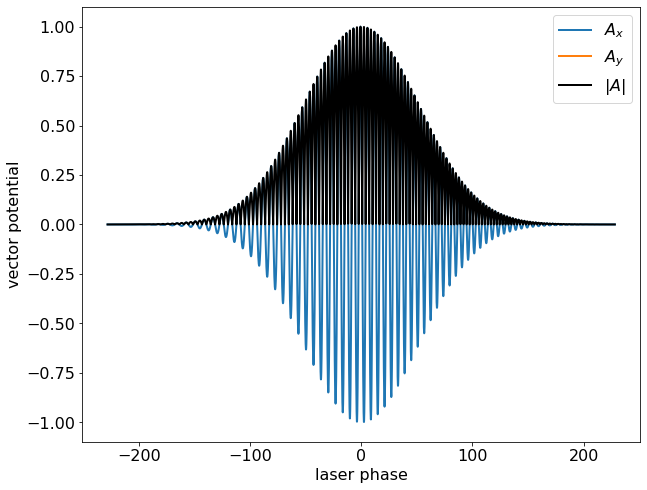

<ipython-input-8-e0783563520a>:16: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(eta, u[1]/np.max(u[1]), label='$u_y$')


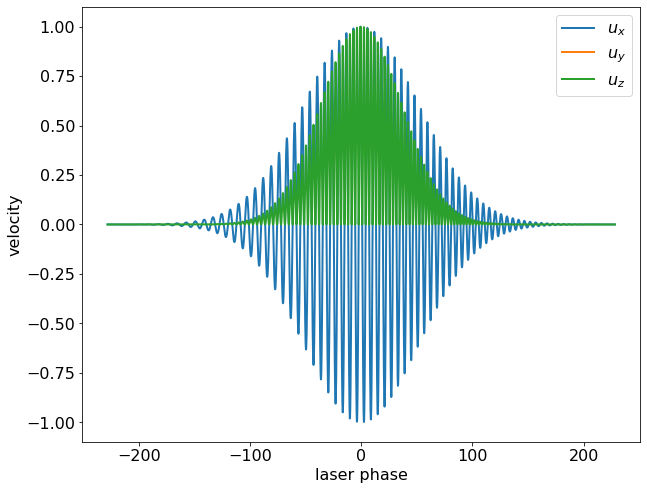

<ipython-input-8-e0783563520a>:25: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(eta, r[1]/np.max(r[1]), label='$y$')


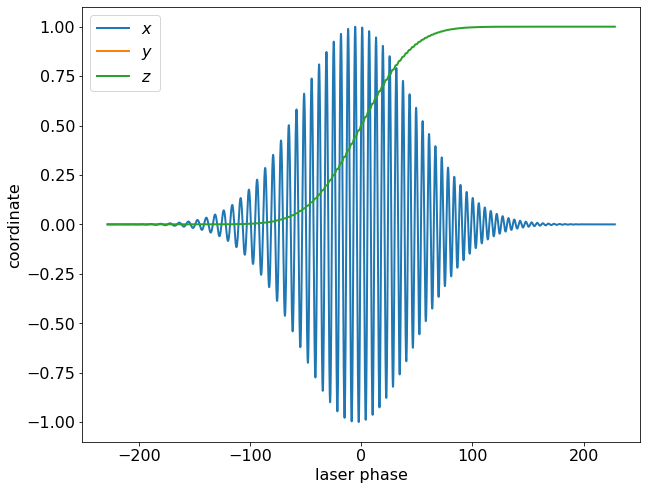

In [8]:
# Plot electron velocity and coordinate

A_mod = np.sqrt(A[0]**2 + A[1]**2)

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(eta, A[0]/np.max(A[0]), label='$A_x$')
plt.plot(eta, A[1]/np.max(A[1]), label='$A_y$')
plt.plot(eta, A_mod/np.max(A_mod), label='$|A|$', color='black')
plt.legend(loc='best')
plt.xlabel('laser phase')
plt.ylabel('vector potential')
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(eta, u[0]/np.max(u[0]), label='$u_x$')
plt.plot(eta, u[1]/np.max(u[1]), label='$u_y$')
plt.plot(eta, u[2]/np.max(u[2]), label='$u_z$')
plt.legend(loc='best')
plt.xlabel('laser phase')
plt.ylabel('velocity')
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(eta, r[0]/np.max(r[0]), label='$x$')
plt.plot(eta, r[1]/np.max(r[1]), label='$y$')
plt.plot(eta, r[2]/np.max(r[2]), label='$z$')
plt.legend(loc='best')
plt.xlabel('laser phase')
plt.ylabel('coordinate')
plt.show()

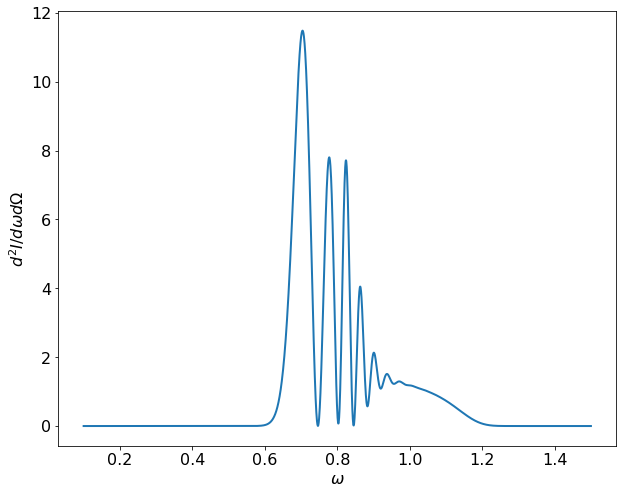

In [9]:
# Plot spectrum I(w)
w0, w1 = [0.1, 1.5]
idx = (w >= w0) & (w <= w1)
w_plot, I_plot = w[idx], I[idx]

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(w_plot, I_plot, label='numerical')
plt.xlabel('$\omega$')
plt.ylabel('$d^2 I / d\omega d\Omega$')
plt.show()

## Data generation for laser pulses with $\tau = 2\pi, 4\pi, 6\pi$

### $\tau = 2\pi$: data generation

In [10]:
mode = 'gauss_spectral'
polarization = 'linear'
tau = 2 * np.pi

# Define grid over beta
beta_start, beta_end = [0., 25.]
n_beta_unit = 4 #6
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta_unit+1))

# Define grid over a0
a0_start, a0_end = [0.5, 3.25]
n_a0_unit = 4 #8
a0_arr = np.linspace(a0_start, a0_end, int((a0_end-a0_start)*n_a0_unit)+1)

# Frequency interval
wb = [.0, 2.5]

# Proceed with calculations
results = a0_beta_scan_classic(beta_arr, a0_arr, tau, wb=wb, mode=mode, polarization=polarization)
w_a0_list, N_ph_a0_list, N_max_a0_list, beta_optimal = results

i = 0, Calculation is finished!
i = 1, Calculation is finished!
i = 2, Calculation is finished!
i = 3, Calculation is finished!
i = 4, Calculation is finished!
i = 5, Calculation is finished!
i = 6, Calculation is finished!
i = 7, Calculation is finished!
i = 8, Calculation is finished!
i = 9, Calculation is finished!
i = 10, Calculation is finished!
i = 11, Calculation is finished!


In [39]:
folder = 'data/simulation/linear/tau_2'

In [12]:
# Transforming and saving the data
N_max_beta_a0 = transform_N_ph_list_to_arr(N_ph_a0_list)
w_a0_list_interp, N_ph_a0_list_interp = interpolate_spectra_for_a0_arr(w_a0_list, N_ph_a0_list, a0_arr)

save_data_fixed_tau(w_a0_list_interp, N_ph_a0_list_interp, beta_arr, a0_arr, N_max_beta_a0,
                    beta_optimal, folder=folder)

Saving is finished


In [40]:
# Loading data
data = load_data_fixed_tau(folder=folder)
w_a0_list_tau_2, N_ph_a0_list_tau_2 = data[:2]
beta_arr_tau_2, a0_arr_tau_2, N_max_beta_a0_tau_2, beta_optimal_tau_2 = data[2:]

In [18]:
# Generate analytics
tau = 2 * np.pi

beta_start, beta_end = [0., 70.]
n_beta = 50
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta+1))

a0_start, a0_end = [0.5, 3.5]
n_a0 = 40
a0_arr = np.linspace(a0_start, a0_end, int((a0_end - a0_start)*n_a0 + 1))

# Solve cusp-on-axis equation and Pearcey maximum equations
beta_cusp, err_cusp = solve_cusp_equation_for_a0_arr(beta_arr, a0_arr, tau)
beta_Pe, w_Pe, err_Pe = solve_Pearcey_max_equation_for_a0_arr(beta_arr, a0_arr, tau)

# Calculate Taylor correction
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

In [5]:
folder = 'data/analytics/tau_2'

In [20]:
save_analytics_fixed_tau(beta_arr, a0_arr, beta_cusp, beta_Pe, w_Pe,
                         beta_Taylor, w_Taylor, folder)

Saving is finished


In [6]:
data = load_analytics_fixed_tau(folder)
beta_arr_th_tau_2, a0_arr_th_tau_2, beta_cusp_tau_2 = data[0], data[1], data[2]
beta_Pe_tau_2, w_Pe_tau_2 = data[3], data[4]
beta_Taylor_tau_2, w_Taylor_tau_2 = data[5], data[6]

### $\tau = 2\pi$: plots 

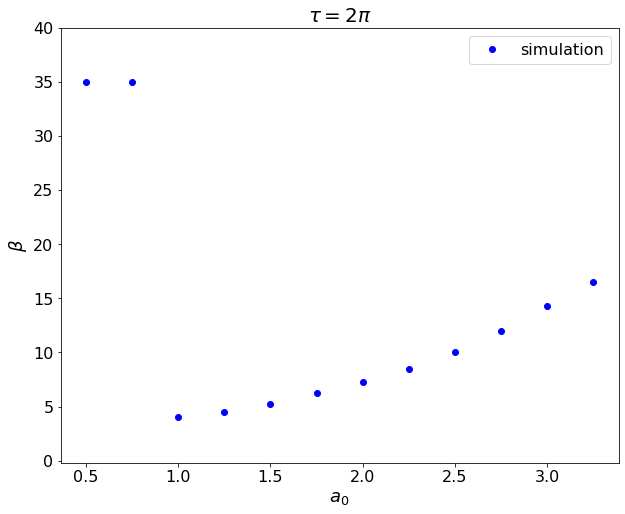

In [14]:
# Plot optimal beta(a0) for simulation, cusp-on-axis, Pearcey max and Taylor
# correction to Pearcey

fig, ax = plt.subplots(figsize=(10,8))

# plt.plot(a0_arr_th_tau_2, beta_cusp_tau_2, color='tab:blue', label='cusp-on-axis')
# plt.plot(a0_arr_th_tau_2, beta_Pe_tau_2, '--', color='red', label='Pearcey max')
# plt.plot(a0_arr_th_tau_2, beta_Taylor_tau_2, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_2, beta_optimal_tau_2, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,40])
plt.title('$\\tau = 2\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

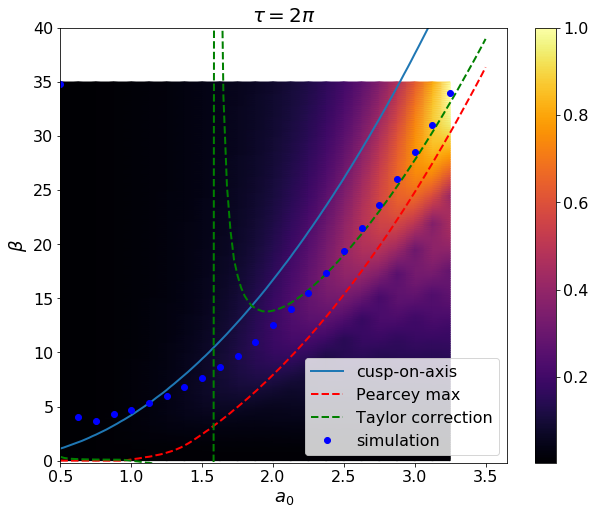

In [10]:
# The same plot but with N_ph_max as color background

fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr_tau_2, beta_arr_tau_2, N_max_beta_a0_tau_2/N_max_beta_a0_tau_2.max(), cmap='inferno',
              shading='gouraud')
plt.colorbar()

plt.plot(a0_arr_th_tau_2, beta_cusp_tau_2, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_2, beta_Pe_tau_2, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_2, beta_Taylor_tau_2, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_2, beta_optimal_tau_2, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,40])
plt.title('$\\tau = 2\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

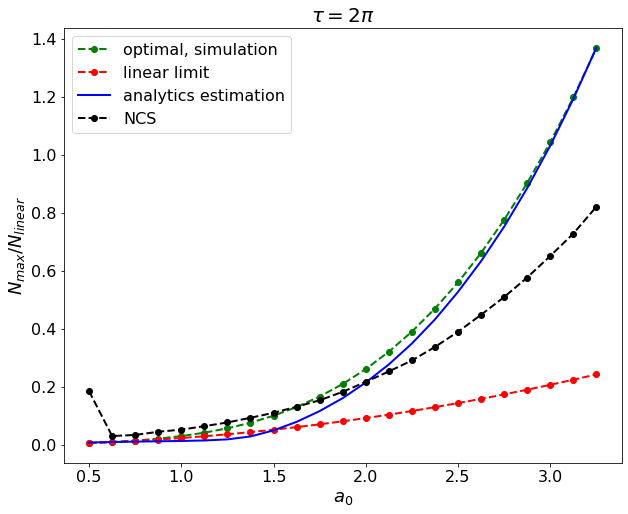

In [23]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 2*np.pi

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th_tau_2, a0_arr_tau_2, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th_tau_2, a0_arr_tau_2, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr_tau_2, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr_tau_2, tau, beta_Pe, w_Pe, beta_optimal_tau_2, 
                           beta_arr_tau_2, N_max_beta_a0_tau_2)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr_tau_2, Nmax_optimal, '--.', color='green', markersize=12, label='optimal, simulation')
plt.plot(a0_arr_tau_2, Nmax_linear, '--.', color='red', markersize=12, label='linear limit')
plt.plot(a0_arr_tau_2, Nmax_estimation, '-', color='blue', label='analytics estimation')
plt.plot(a0_arr_tau_2, N_ph_NCS_max, '--.', color='black', markersize=12, label='NCS')
plt.title('$\\tau = 2\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$N_{max}/N_{linear}$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

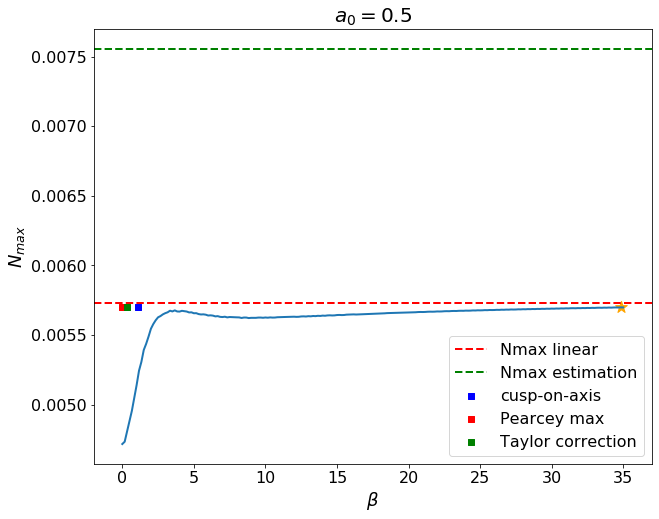

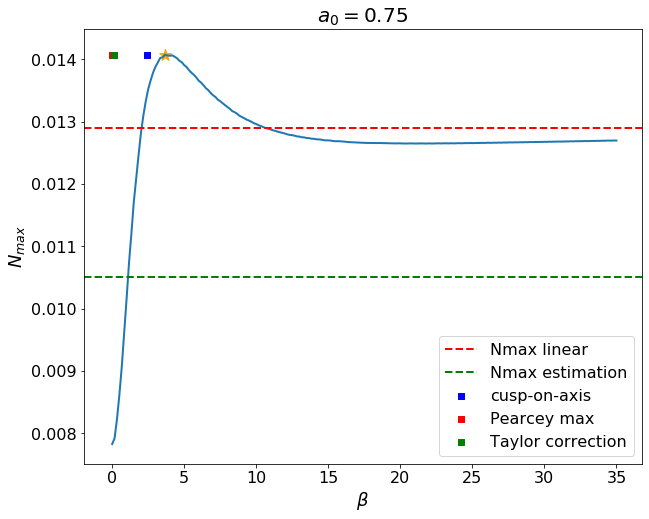

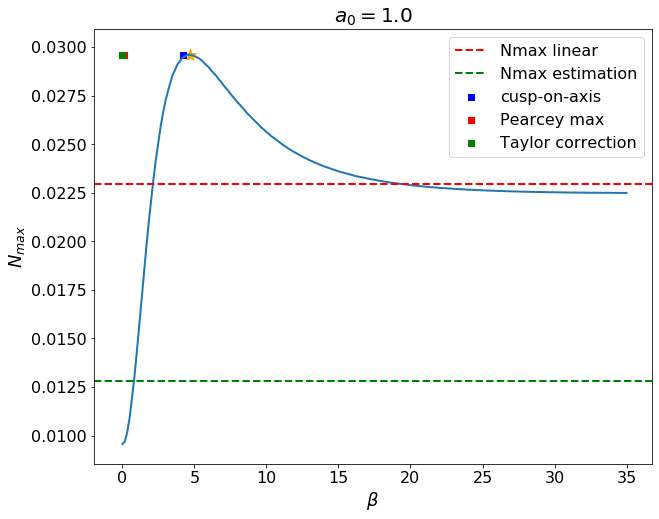

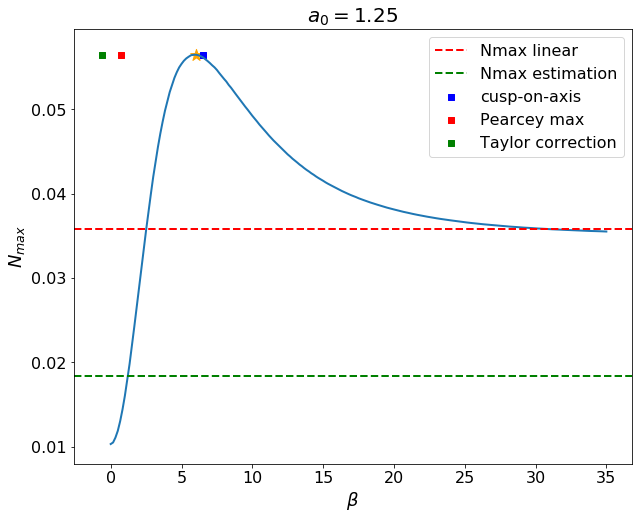

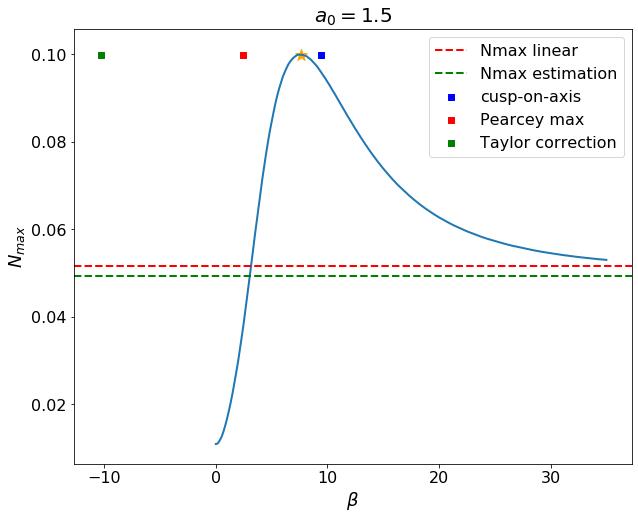

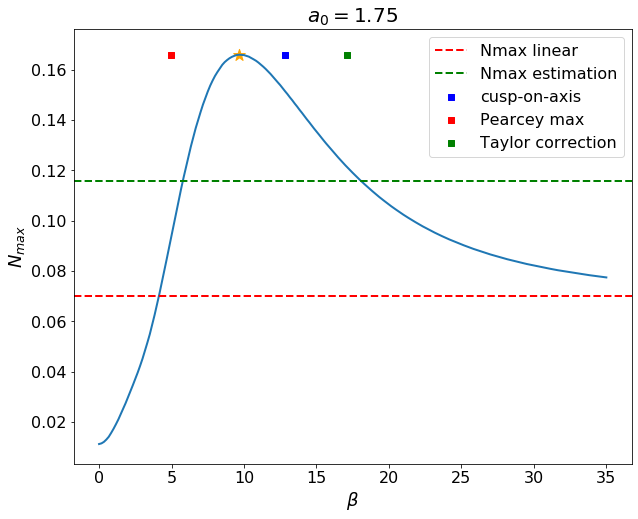

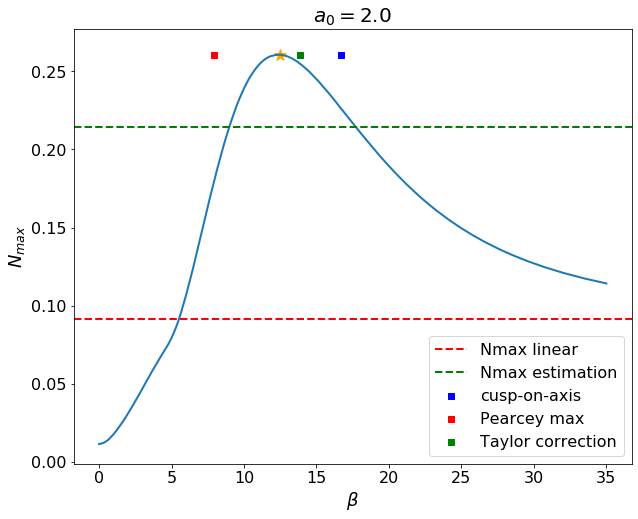

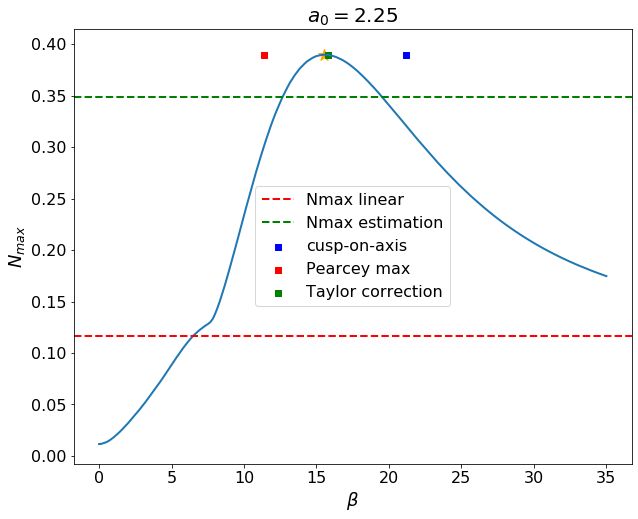

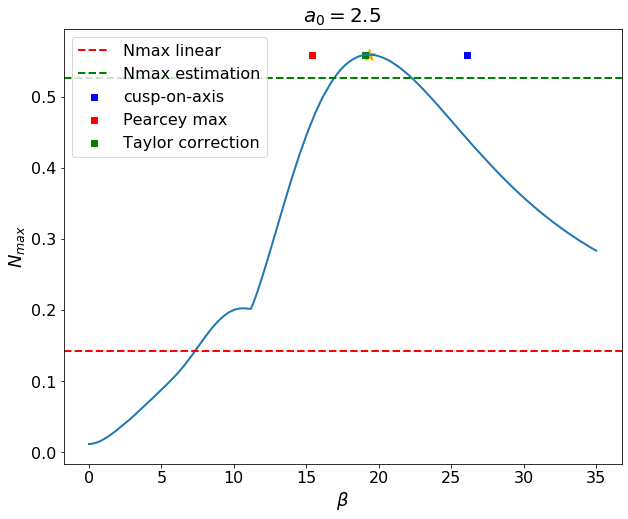

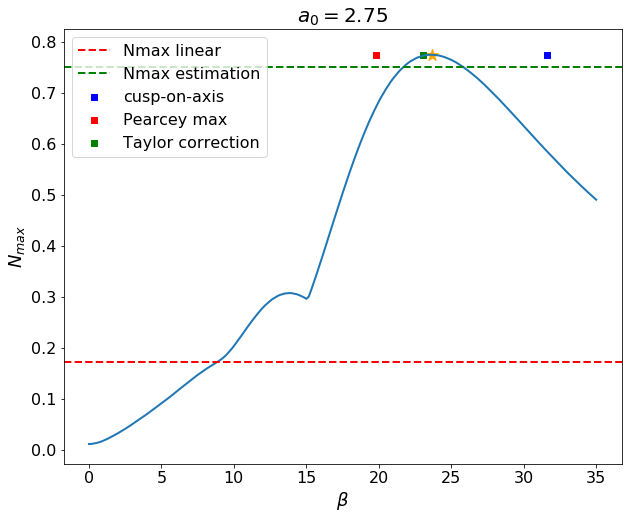

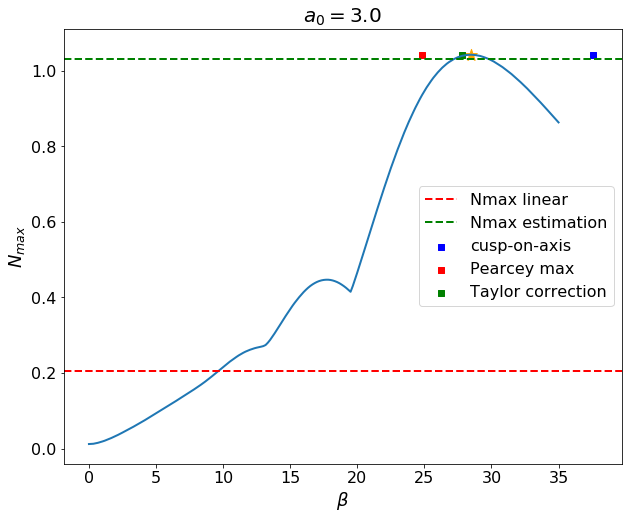

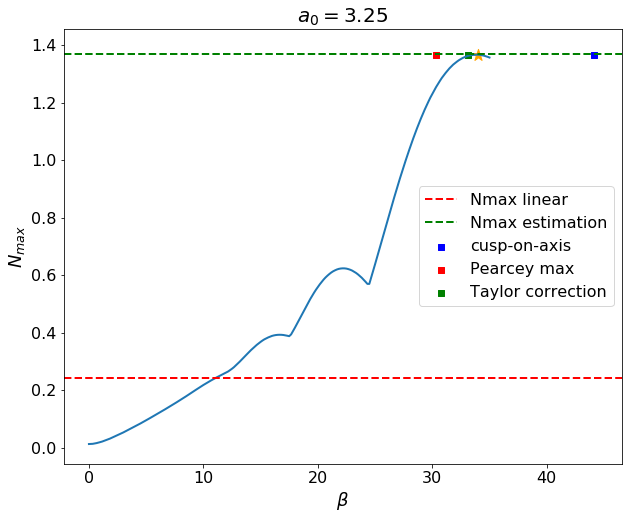

In [26]:
# Plot N_max(beta) + linear_reference + spectrum_estimate for a range of a0
n_a0 = a0_arr_tau_2.shape[0]
for idx in range(0, n_a0, 2):
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot(beta_arr_tau_2, N_max_beta_a0_tau_2[:,idx])
    y_pos = np.max(N_max_beta_a0_tau_2[:,idx])
    
    plt.scatter(beta_optimal_tau_2[idx], y_pos, color='orange', marker='*', s=150)
    plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', label='cusp-on-axis')
    plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', label='Pearcey max')
    plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', label='Taylor correction')
    
    ax.axhline(Nmax_linear[idx], linestyle='--', color='red', label='Nmax linear')
    ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', label='Nmax estimation')
    
    plt.xlabel('$\\beta$', fontsize=18)
    plt.ylabel('$N_{max}$', fontsize=18)
    plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

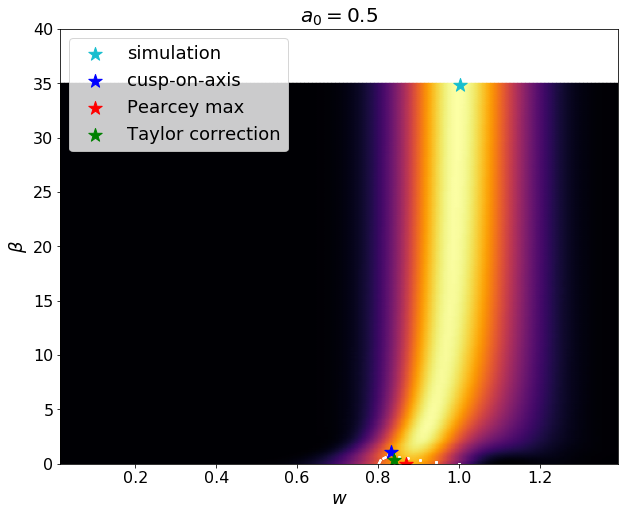

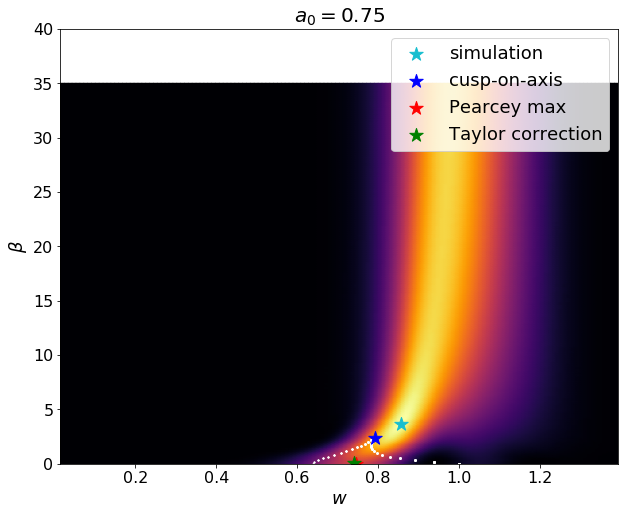

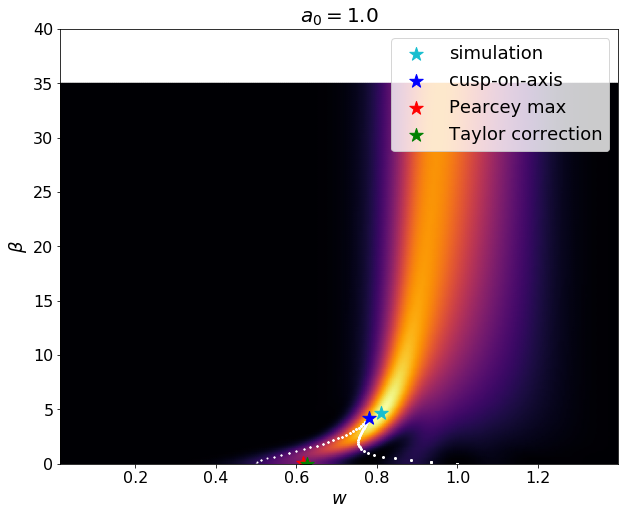

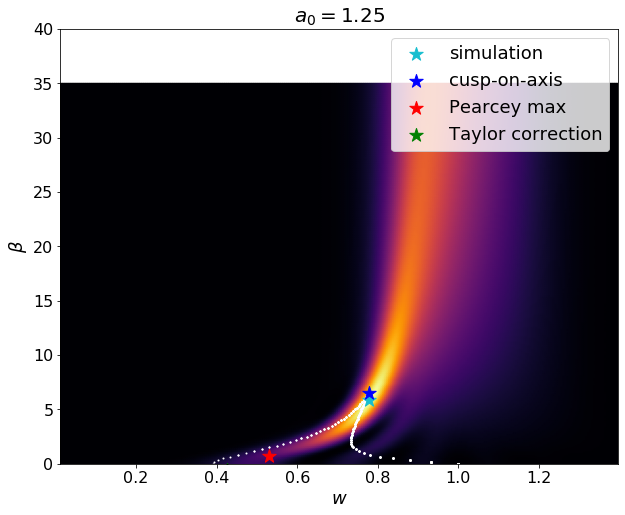

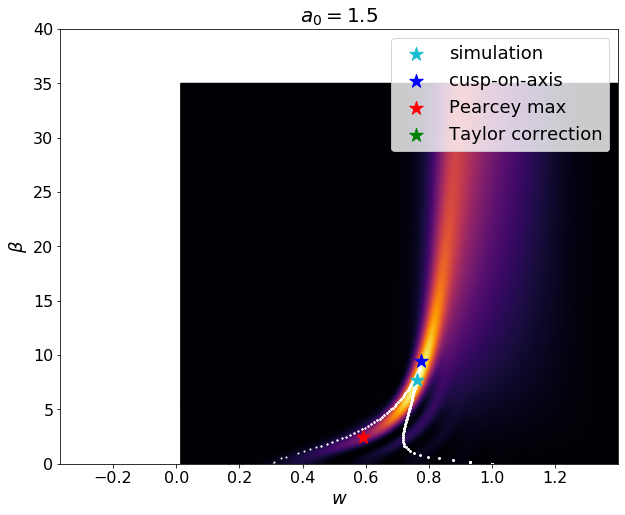

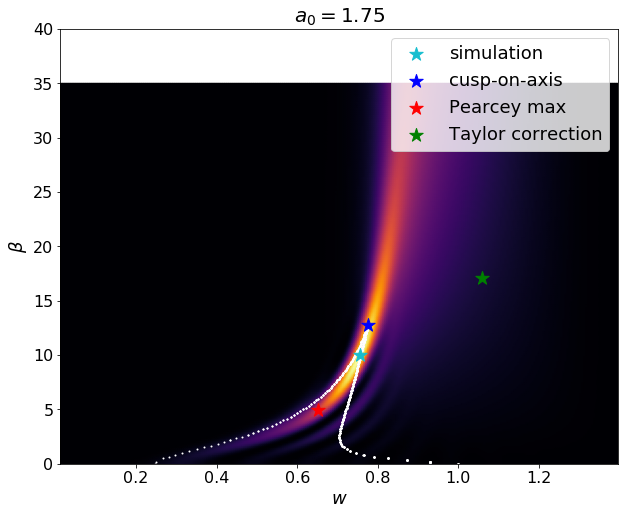

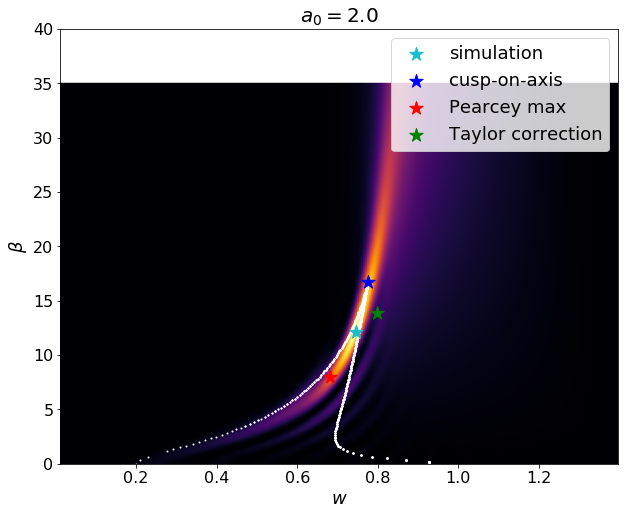

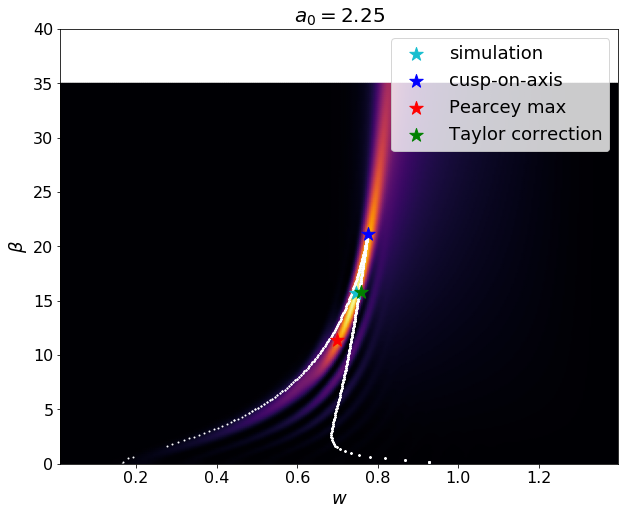

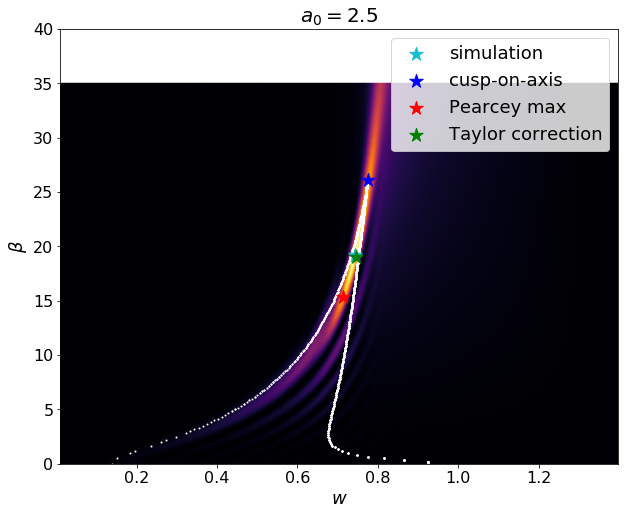

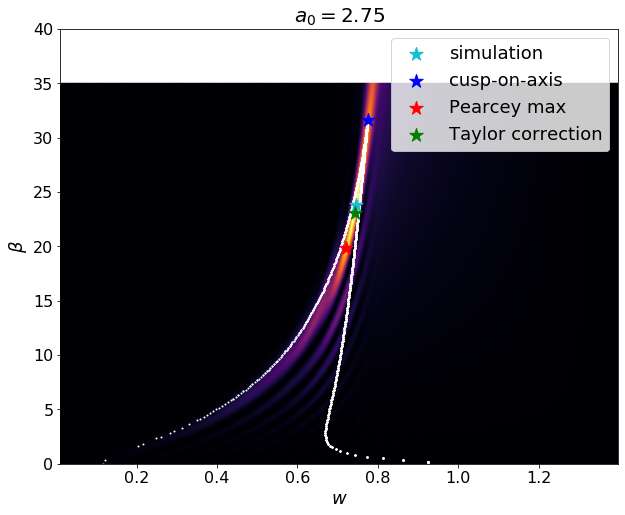

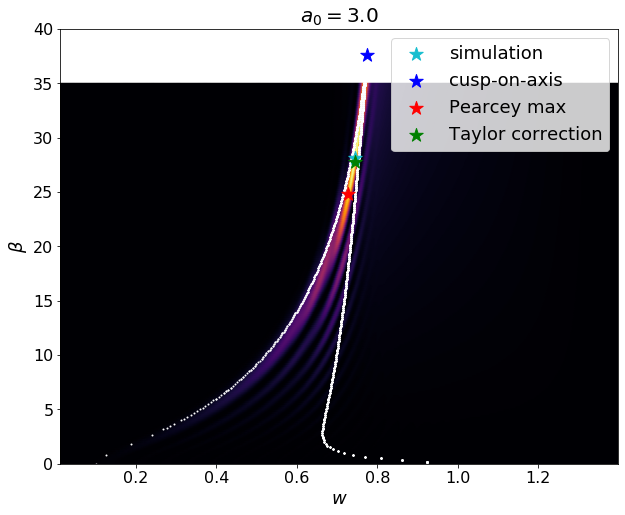

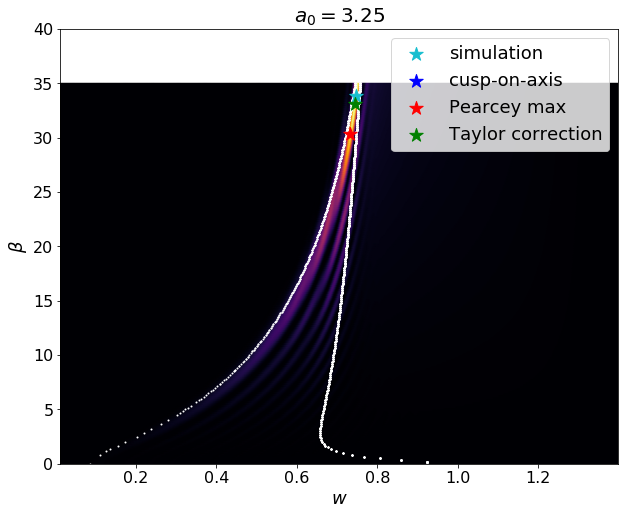

In [13]:
# For a range of a0 values plot folds+cusp plots in (beta, w)
tau = 2*np.pi

n_a0 = a0_arr_tau_2.shape[0]
for idx in range(0, n_a0, 2):
    idx_beta, idx_w = np.where(N_ph_a0_list_tau_2[idx] == N_ph_a0_list_tau_2[idx].max())
    beta_fold, w_fold = calculate_fold_w_beta(beta_arr_tau_2, a0_arr_tau_2[idx],
                                              tau, eps=3e-2)
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(w_a0_list_tau_2[idx], beta_arr_tau_2, N_ph_a0_list_tau_2[idx],
                   cmap='inferno', shading='gouraud')
    
    plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
    
    plt.scatter(w_a0_list_tau_2[idx][idx_w[0]], beta_arr_tau_2[idx_beta[0]], color='tab:cyan', marker='*', s=200, zorder=2, label='simulation')
    plt.scatter(w_cusp[idx], beta_cusp[idx], color='blue', marker='*', s=200, zorder=2, label='cusp-on-axis')
    plt.scatter(w_Pe[idx], beta_Pe[idx], color='red', marker='*', s=200, zorder=2, label='Pearcey max')
    plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='green', marker='*', s=200, zorder=2, label='Taylor correction')

    ax.set_ylim([0.,40.])
    plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
    plt.xlabel('$w$', fontsize=18)
    plt.ylabel('$\\beta$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best', fontsize=18)
    plt.show()

### $\tau = 4\pi$: data generation

In [15]:
mode = 'gauss_spectral'
polarization = 'linear'
tau = 4 * np.pi

# Define grid over beta
beta_start, beta_end = [0., 45.]
n_beta_unit = 4
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta_unit+1))

# Define grid over a0
a0_start, a0_end = [0.5, 2.5]
n_a0_unit = 4 #8
a0_arr = np.linspace(a0_start, a0_end, int((a0_end-a0_start)*n_a0_unit)+1)

# Frequency interval
wb = [.0, 2.0]

# Proceed with calculations
results = a0_beta_scan_classic(beta_arr, a0_arr, tau, wb=wb, mode=mode, polarization=polarization)
w_a0_list, N_ph_a0_list, N_max_a0_list, beta_optimal = results

i = 0, Calculation is finished!
i = 1, Calculation is finished!
i = 2, Calculation is finished!
i = 3, Calculation is finished!
i = 4, Calculation is finished!
i = 5, Calculation is finished!
i = 6, Calculation is finished!
i = 7, Calculation is finished!
i = 8, Calculation is finished!


In [41]:
folder = 'data/simulation/linear/tau_4'

In [18]:
# Transforming and saving the data
N_max_beta_a0 = transform_N_ph_list_to_arr(N_ph_a0_list)
w_a0_list_interp, N_ph_a0_list_interp = interpolate_spectra_for_a0_arr(w_a0_list, N_ph_a0_list, a0_arr)

save_data_fixed_tau(w_a0_list_interp, N_ph_a0_list_interp, beta_arr, a0_arr, N_max_beta_a0,
                    beta_optimal, folder=folder)

Saving is finished


In [42]:
# Loading data
data = load_data_fixed_tau(folder=folder)
w_a0_list_tau_4, N_ph_a0_list_tau_4 = data[:2]
beta_arr_tau_4, a0_arr_tau_4, N_max_beta_a0_tau_4, beta_optimal_tau_4 = data[2:]

In [29]:
# Generate analytics
tau = 4 * np.pi

beta_start, beta_end = [0., 80.]
n_beta = 50
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta+1))

a0_start, a0_end = [0.5, 2.5]
n_a0 = 40
a0_arr = np.linspace(a0_start, a0_end, int((a0_end - a0_start)*n_a0 + 1))

# Solve cusp-on-axis equation and Pearcey maximum equations
beta_cusp, err_cusp = solve_cusp_equation_for_a0_arr(beta_arr, a0_arr, tau)
beta_Pe, w_Pe, err_Pe = solve_Pearcey_max_equation_for_a0_arr(beta_arr, a0_arr, tau)

# Calculate Taylor correction
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

In [9]:
folder = 'data/analytics/tau_4'

In [31]:
save_analytics_fixed_tau(beta_arr, a0_arr, beta_cusp, beta_Pe, w_Pe,
                         beta_Taylor, w_Taylor, folder)

Saving is finished


In [10]:
data = load_analytics_fixed_tau(folder)
beta_arr_th_tau_4, a0_arr_th_tau_4, beta_cusp_tau_4 = data[0], data[1], data[2]
beta_Pe_tau_4, w_Pe_tau_4 = data[3], data[4]
beta_Taylor_tau_4, w_Taylor_tau_4 = data[5], data[6]

### $\tau = 4\pi$: plots

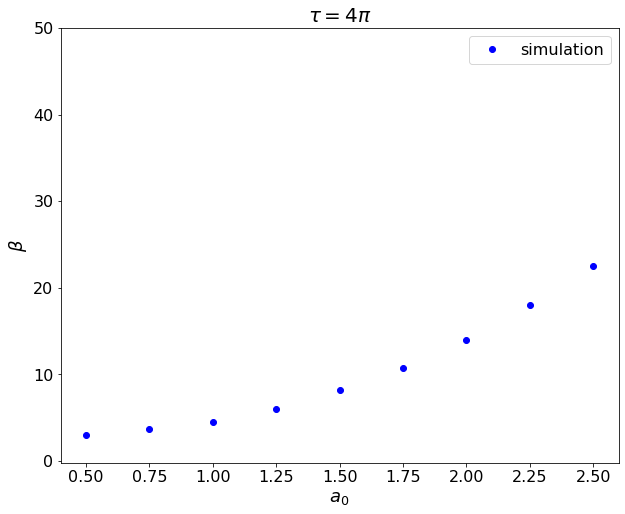

In [20]:
# Plot optimal beta(a0) for simulation, cusp-on-axis, Pearcey max and Taylor
# correction to Pearcey

fig, ax = plt.subplots(figsize=(10,8))

# plt.plot(a0_arr_th_tau_4, beta_cusp_tau_4, color='tab:blue', label='cusp-on-axis')
# plt.plot(a0_arr_th_tau_4, beta_Pe_tau_4, '--', color='red', label='Pearcey max')
# plt.plot(a0_arr_th_tau_4, beta_Taylor_tau_4, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_4, beta_optimal_tau_4, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,50])
plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

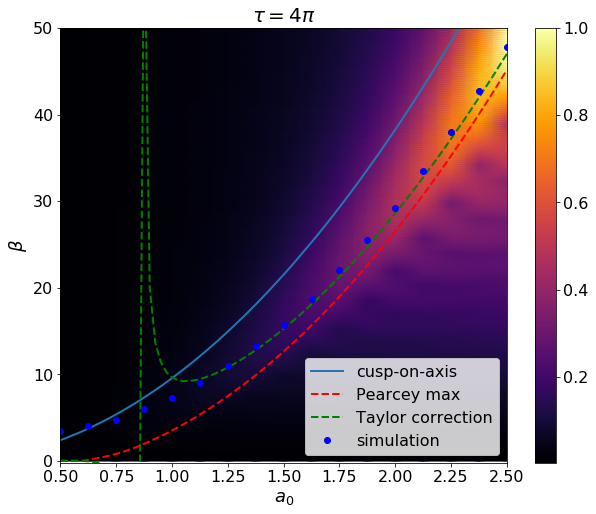

In [19]:
# The same plot but with N_ph_max as color background

fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr_tau_4, beta_arr_tau_4, N_max_beta_a0_tau_4/N_max_beta_a0_tau_4.max(), cmap='inferno',
              shading='gouraud')
plt.colorbar()

plt.plot(a0_arr_th_tau_4, beta_cusp_tau_4, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_4, beta_Pe_tau_4, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_4, beta_Taylor_tau_4, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_4, beta_optimal_tau_4, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,50])
plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

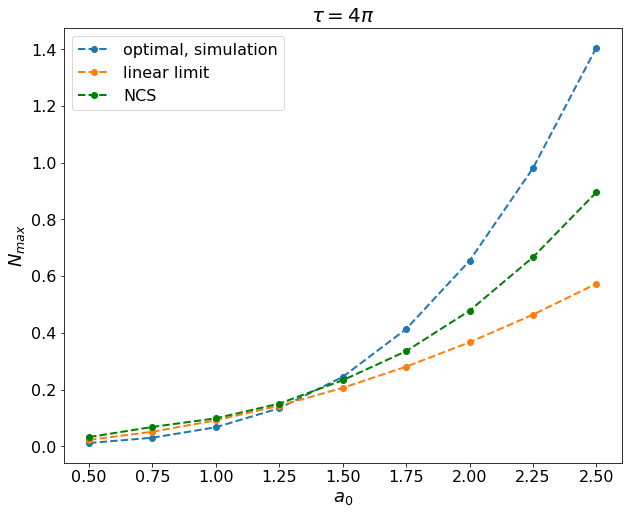

In [47]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 4*np.pi

# beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th_tau_4, a0_arr_tau_4, tau)
# beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th_tau_4, a0_arr_tau_4, tau)
# beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr_tau_4, tau)

# tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
# w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

# data = collect_Nmax_arrays(a0_arr_tau_4, tau, beta_Pe, w_Pe, beta_optimal_tau_4, 
#                            beta_arr_tau_4, N_max_beta_a0_tau_4)
# Nmax_linear, Nmax_optimal, Nmax_estimation = data
# Nmax_linear_norm = Nmax_linear / Nmax_linear
# Nmax_optimal_norm = Nmax_optimal / Nmax_linear
# Nmax_estimation_norm = Nmax_estimation / Nmax_linear

Nmax_linear = a0_arr_tau_4**2 * tau**2 / 137 / (4*np.pi)

Nmax_optimal = np.zeros_like(a0_arr_tau_4)

for i,a0 in enumerate(a0_arr_tau_4):
    beta0 = beta_optimal_tau_4[i]
    idx_beta0 = np.where(np.isclose(beta_arr_tau_4, beta0))[0][0]
    Nmax_optimal[i] = N_max_beta_a0_tau_4[idx_beta0,i]


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr_tau_4, Nmax_optimal, '--.', color='tab:blue', markersize=12, label='optimal, simulation')
plt.plot(a0_arr_tau_4, Nmax_linear, '--.', color='tab:orange', markersize=12, label='linear limit')
# plt.plot(a0_arr_tau_4, Nmax_estimation, '-', color='blue', label='analytics estimation')
plt.plot(a0_arr_tau_4, N_ph_NCS_max, '--.', color='green', markersize=12, label='NCS')
plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$N_{max}$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

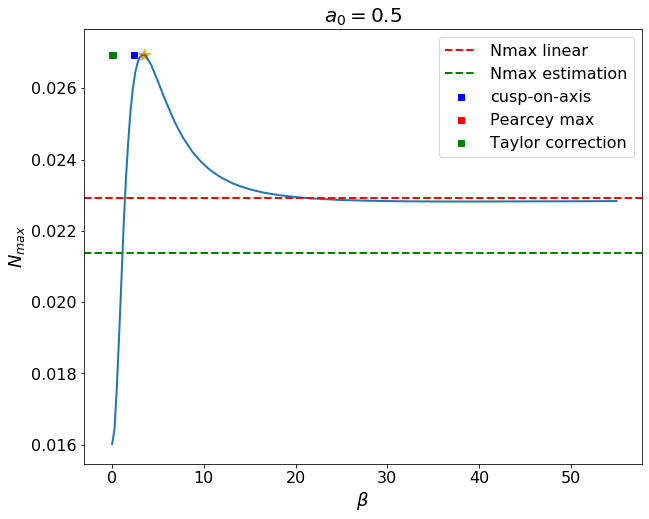

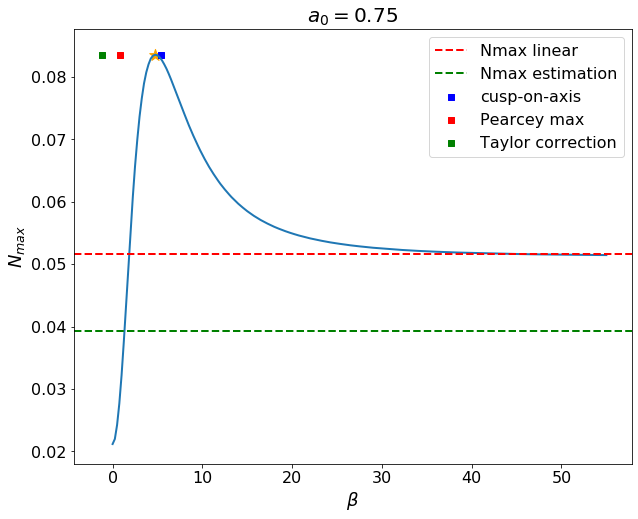

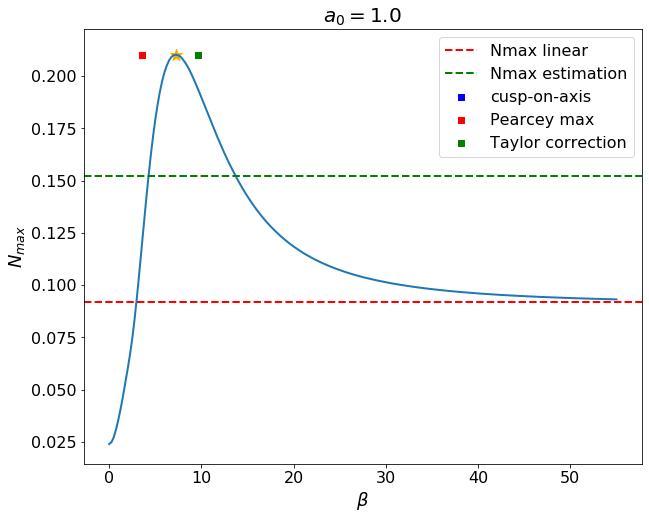

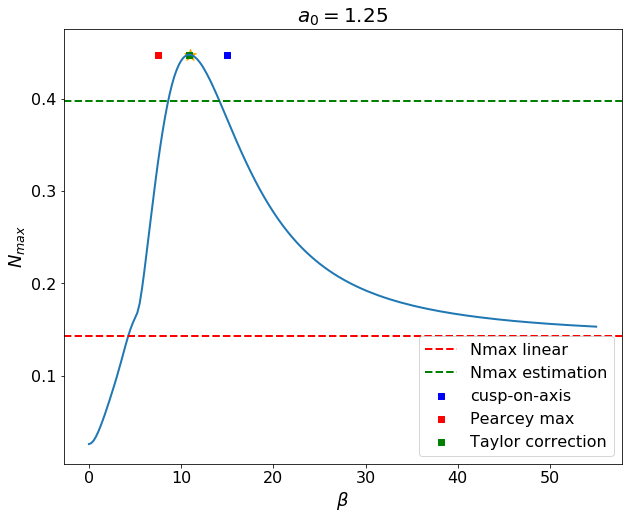

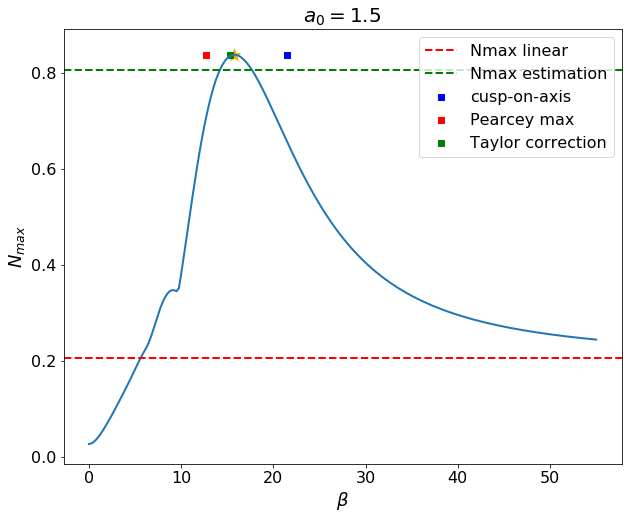

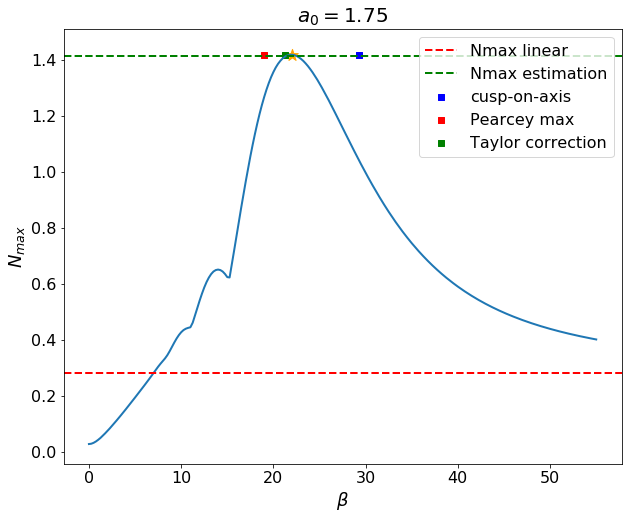

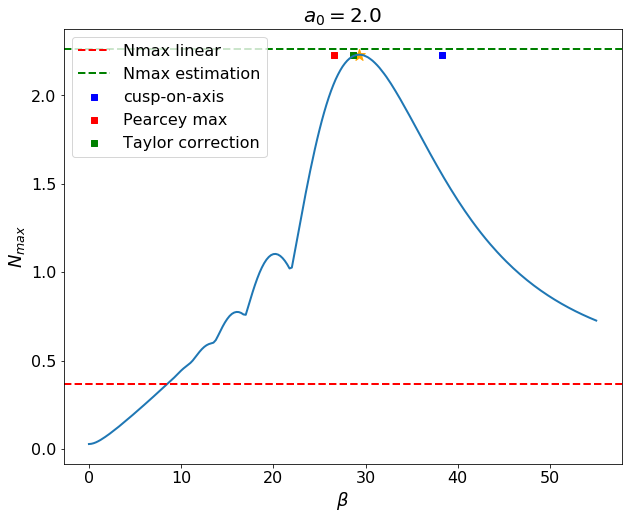

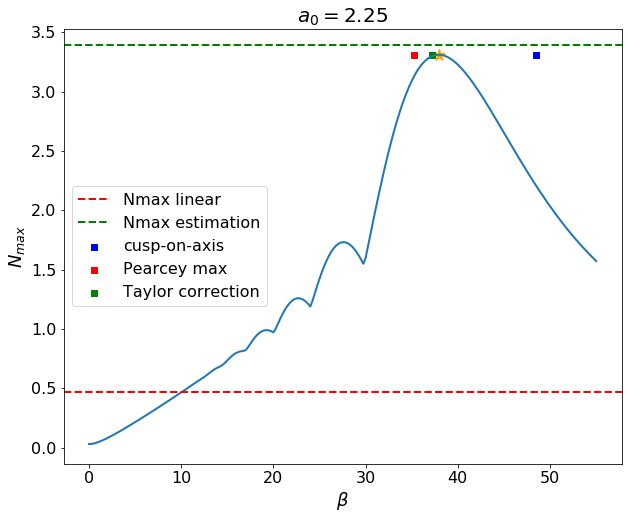

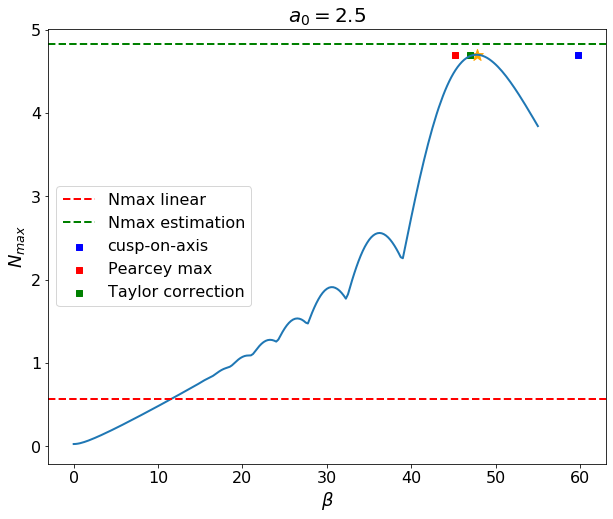

In [36]:
# Plot N_max(beta) + linear_reference + spectrum_estimate for a range of a0
n_a0 = a0_arr_tau_4.shape[0]
for idx in range(0, n_a0, 2):
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot(beta_arr_tau_4, N_max_beta_a0_tau_4[:,idx])
    y_pos = np.max(N_max_beta_a0_tau_4[:,idx])
    
    plt.scatter(beta_optimal_tau_4[idx], y_pos, color='orange', marker='*', s=150)
    plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', label='cusp-on-axis')
    plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', label='Pearcey max')
    plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', label='Taylor correction')
    
    ax.axhline(Nmax_linear[idx], linestyle='--', color='red', label='Nmax linear')
    ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', label='Nmax estimation')
    
    plt.xlabel('$\\beta$', fontsize=18)
    plt.ylabel('$N_{max}$', fontsize=18)
    plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

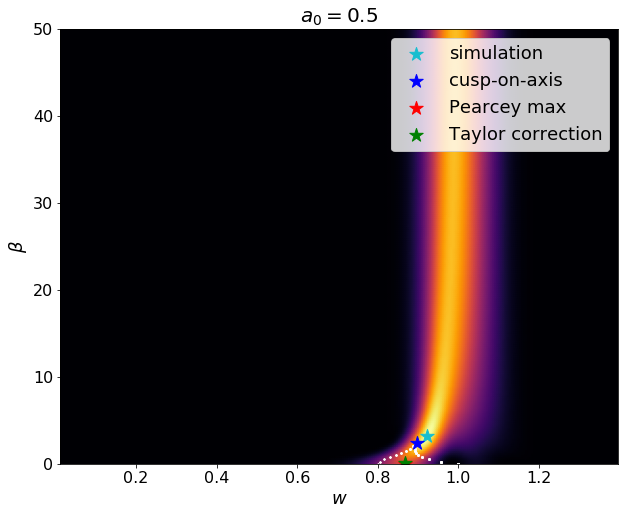

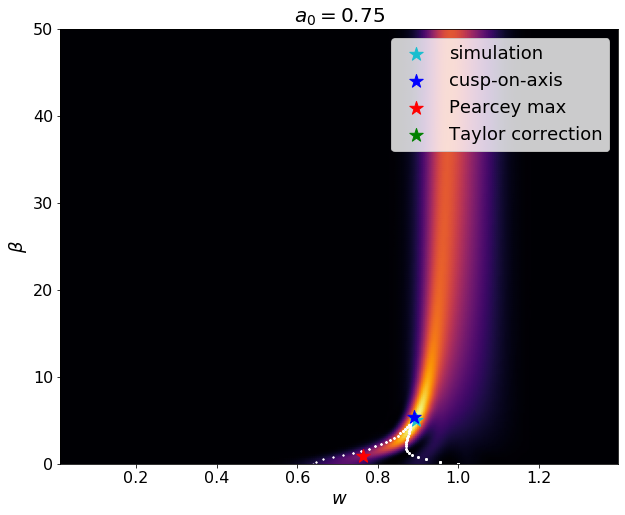

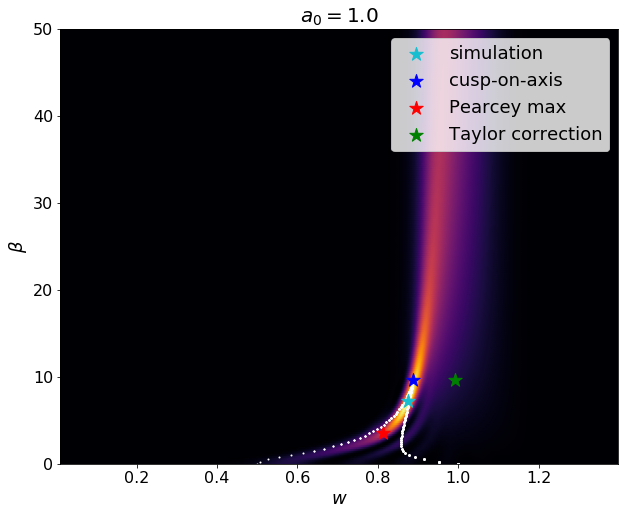

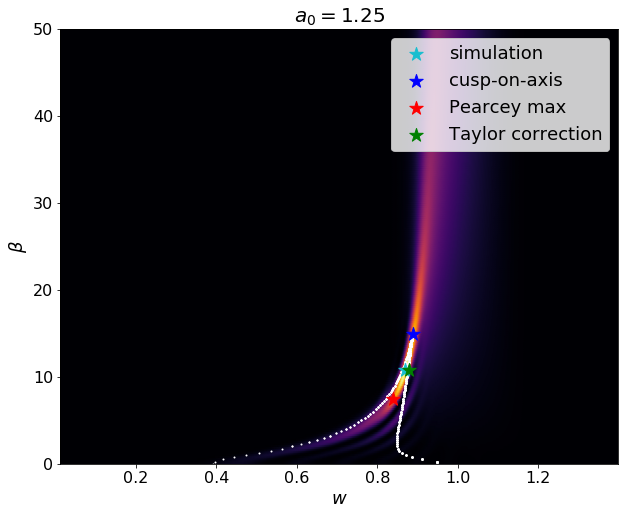

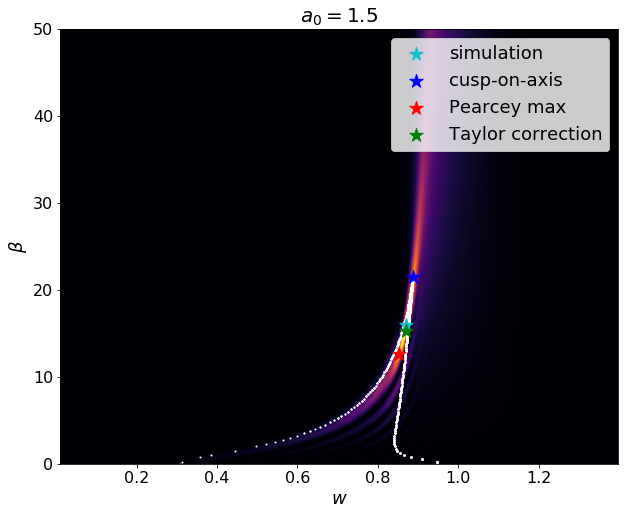

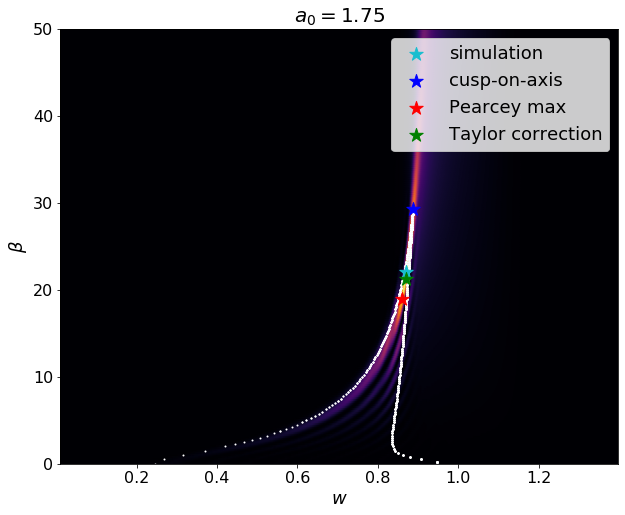

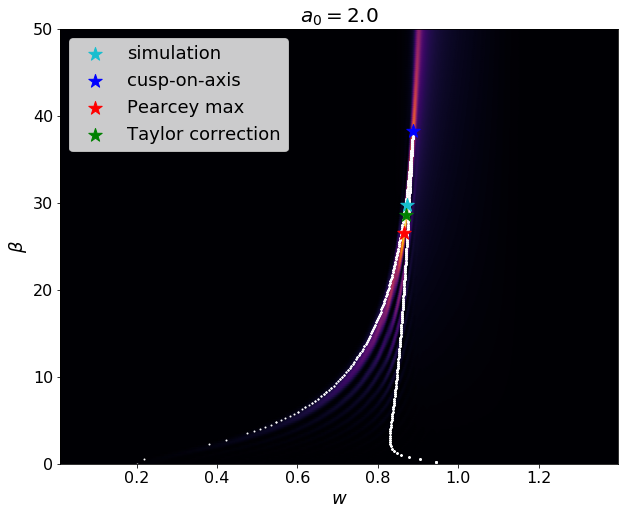

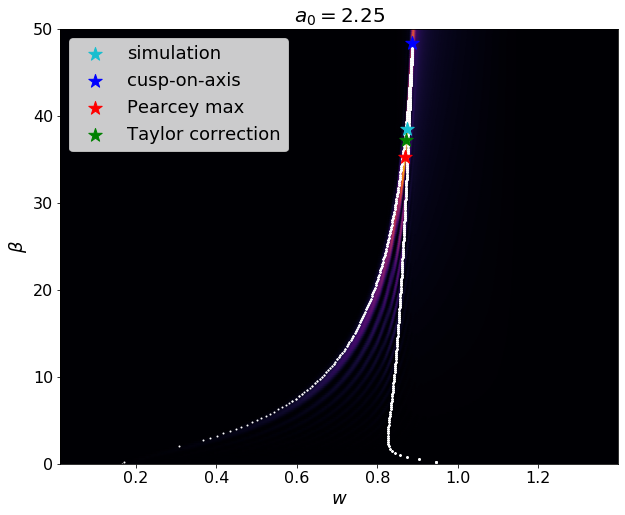

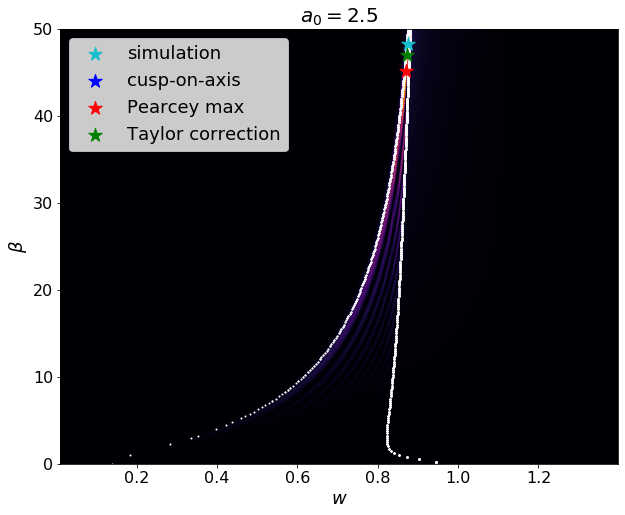

In [21]:
# For a range of a0 values plot folds+cusp plots in (beta, w)
tau = 4*np.pi

n_a0 = a0_arr_tau_4.shape[0]
for idx in range(0, n_a0, 2):
    idx_beta, idx_w = np.where(N_ph_a0_list_tau_4[idx] == N_ph_a0_list_tau_4[idx].max())
    beta_fold, w_fold = calculate_fold_w_beta(beta_arr_tau_4, a0_arr_tau_4[idx],
                                              tau, eps=2e-2)
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(w_a0_list_tau_4[idx], beta_arr_tau_4, N_ph_a0_list_tau_4[idx],
                   cmap='inferno', shading='gouraud')
    
    plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
    # for i,(phi, w) in enumerate(data):
    #     plt.plot(w, beta_arr[i]*np.ones_like(w), '.', color='white', markersize=2, zorder=1)
    plt.scatter(w_a0_list_tau_4[idx][idx_w[0]], beta_arr_tau_4[idx_beta[0]], color='tab:cyan', marker='*', s=200, zorder=2, label='simulation')
    plt.scatter(w_cusp[idx], beta_cusp[idx], color='blue', marker='*', s=200, zorder=2, label='cusp-on-axis')
    plt.scatter(w_Pe[idx], beta_Pe[idx], color='red', marker='*', s=200, zorder=2, label='Pearcey max')
    plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='green', marker='*', s=200, zorder=2, label='Taylor correction')

    ax.set_ylim([0.,50.])
    plt.title('$a_0 = {}$'.format(a0_arr_tau_4[idx]), fontsize=20)
    plt.xlabel('$w$', fontsize=18)
    plt.ylabel('$\\beta$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best', fontsize=18)
    plt.show()

### $\tau = 6\pi$: data generation

In [21]:
mode = 'gauss_spectral'
polarization = 'linear'
tau = 6 * np.pi

# Define grid over beta
beta_start, beta_end = [0., 40.]
n_beta_unit = 4
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta_unit+1))

# Define grid over a0
a0_start, a0_end = [0.5, 2.25]
n_a0_unit = 8
a0_arr = np.linspace(a0_start, a0_end, int((a0_end-a0_start)*n_a0_unit)+1)

# Frequency interval
wb = [.0, 1.4]

# Proceed with calculations
results = a0_beta_scan_classic(beta_arr, a0_arr, tau, wb=wb, mode=mode, polarization=polarization)
w_a0_list, N_ph_a0_list, N_max_a0_list, beta_optimal = results

i = 0, Calculation is finished!
i = 1, Calculation is finished!
i = 2, Calculation is finished!
i = 3, Calculation is finished!
i = 4, Calculation is finished!
i = 5, Calculation is finished!
i = 6, Calculation is finished!
i = 7, Calculation is finished!
i = 8, Calculation is finished!
i = 9, Calculation is finished!
i = 10, Calculation is finished!
i = 11, Calculation is finished!
i = 12, Calculation is finished!
i = 13, Calculation is finished!
i = 14, Calculation is finished!


In [43]:
folder = 'data/simulation/linear/tau_6'

In [23]:
# Transforming and saving the data
N_max_beta_a0 = transform_N_ph_list_to_arr(N_ph_a0_list)
w_a0_list_interp, N_ph_a0_list_interp = interpolate_spectra_for_a0_arr(w_a0_list, N_ph_a0_list, a0_arr)

save_data_fixed_tau(w_a0_list_interp, N_ph_a0_list_interp, beta_arr, a0_arr, N_max_beta_a0,
                    beta_optimal, folder=folder)

Saving is finished


In [44]:
# Loading data
data = load_data_fixed_tau(folder=folder)
w_a0_list_tau_6, N_ph_a0_list_tau_6 = data[:2]
beta_arr_tau_6, a0_arr_tau_6, N_max_beta_a0_tau_6, beta_optimal_tau_6 = data[2:]

In [41]:
# Generate analytics
tau = 6 * np.pi

beta_start, beta_end = [0., 80.]
n_beta = 50
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta+1))

a0_start, a0_end = [0.5, 2.5]
n_a0 = 40
a0_arr = np.linspace(a0_start, a0_end, int((a0_end - a0_start)*n_a0 + 1))

# Solve cusp-on-axis equation and Pearcey maximum equations
beta_cusp, err_cusp = solve_cusp_equation_for_a0_arr(beta_arr, a0_arr, tau)
beta_Pe, w_Pe, err_Pe = solve_Pearcey_max_equation_for_a0_arr(beta_arr, a0_arr, tau)

# Calculate Taylor correction
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

In [13]:
folder = 'data/analytics/tau_6'

In [43]:
save_analytics_fixed_tau(beta_arr, a0_arr, beta_cusp, beta_Pe, w_Pe,
                         beta_Taylor, w_Taylor, folder)

Saving is finished


In [14]:
data = load_analytics_fixed_tau(folder)
beta_arr_th_tau_6, a0_arr_th_tau_6, beta_cusp_tau_6 = data[0], data[1], data[2]
beta_Pe_tau_6, w_Pe_tau_6 = data[3], data[4]
beta_Taylor_tau_6, w_Taylor_tau_6 = data[5], data[6]

### $\tau = 6\pi$: plots

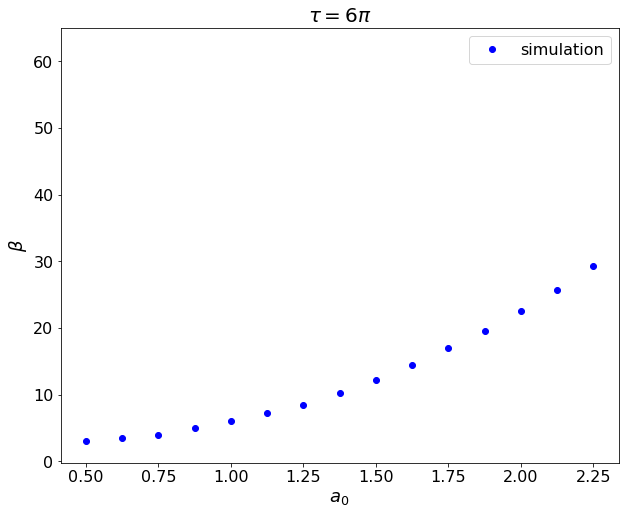

In [25]:
# Plot optimal beta(a0) for simulation, cusp-on-axis, Pearcey max and Taylor
# correction to Pearcey

fig, ax = plt.subplots(figsize=(10,8))

# plt.plot(a0_arr_th_tau_6, beta_cusp_tau_6, color='tab:blue', label='cusp-on-axis')
# plt.plot(a0_arr_th_tau_6, beta_Pe_tau_6, '--', color='red', label='Pearcey max')
# plt.plot(a0_arr_th_tau_6, beta_Taylor_tau_6, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_6, beta_optimal_tau_6, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,65])
plt.title('$\\tau = 6\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

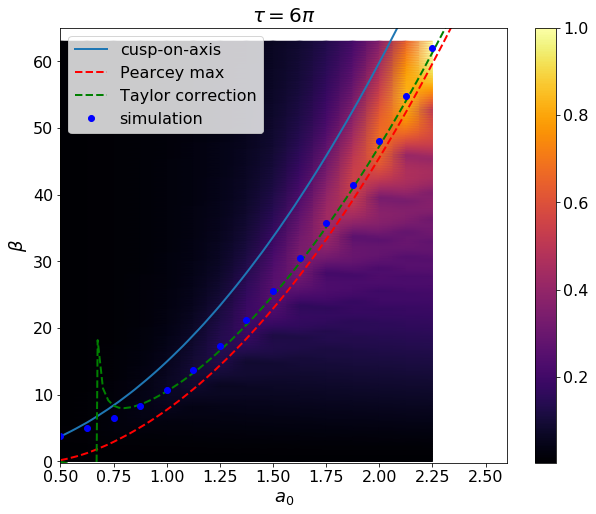

In [27]:
# The same plot but with N_ph_max as color background

fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr_tau_6, beta_arr_tau_6, N_max_beta_a0_tau_6/N_max_beta_a0_tau_6.max(), cmap='inferno',
              shading='gouraud')
plt.colorbar()

plt.plot(a0_arr_th_tau_6, beta_cusp_tau_6, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_6, beta_Pe_tau_6, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_6, beta_Taylor_tau_6, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_6, beta_optimal_tau_6, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,65])
plt.title('$\\tau = 6\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

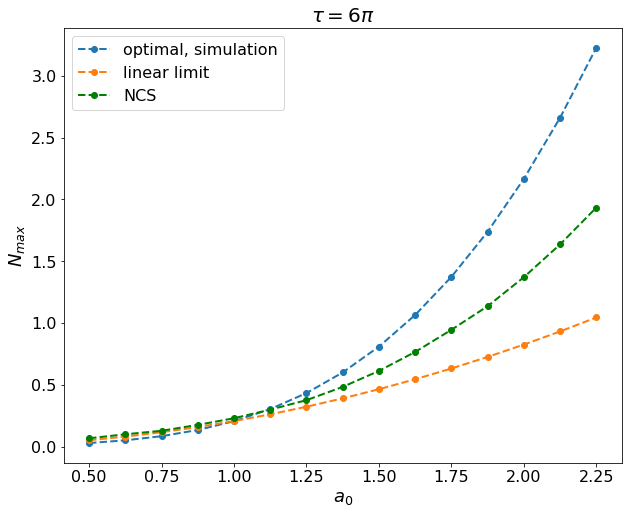

In [8]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 6*np.pi

# beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th_tau_6, a0_arr_tau_6, tau)
# beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th_tau_6, a0_arr_tau_6, tau)
# beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr_tau_6, tau)

# tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
# w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

# data = collect_Nmax_arrays(a0_arr_tau_6, tau, beta_Pe, w_Pe, beta_optimal_tau_6, 
#                            beta_arr_tau_6, N_max_beta_a0_tau_6)
# Nmax_linear, Nmax_optimal, Nmax_estimation = data
# Nmax_linear_norm = Nmax_linear / Nmax_linear
# Nmax_optimal_norm = Nmax_optimal / Nmax_linear
# Nmax_estimation_norm = Nmax_estimation / Nmax_linear

Nmax_linear = a0_arr_tau_6**2 * tau**2 / 137 / (4*np.pi)

Nmax_optimal = np.zeros_like(a0_arr_tau_6)

for i,a0 in enumerate(a0_arr_tau_6):
    beta0 = beta_optimal_tau_6[i]
    idx_beta0 = np.where(np.isclose(beta_arr_tau_6, beta0))[0][0]
    Nmax_optimal[i] = N_max_beta_a0_tau_6[idx_beta0,i]


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr_tau_6, Nmax_optimal, '--.', color='tab:blue', markersize=12, label='optimal, simulation')
plt.plot(a0_arr_tau_6, Nmax_linear, '--.', color='tab:orange', markersize=12, label='linear limit')
# plt.plot(a0_arr_tau_6, Nmax_estimation, '-', color='blue', label='analytics estimation')
plt.plot(a0_arr_tau_6, N_ph_NCS_max, '--.', color='green', markersize=12, label='NCS')

plt.title('$\\tau = 6\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$N_{max}$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [27]:
a0 = 2
tau = 6 * np.pi
mode = 'gauss_spectral'   # Temporal envelope
idx_a0 = np.where(np.isclose(a0_arr_tau_6, a0))[0][0]
beta = beta_optimal_tau_6[idx_a0]  # Chirp parameter
polarization = 'linear'

eta_b = 4.4*tau*np.sqrt(1+beta**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau, a0, beta, polarization=polarization)
u, r = traj.calc_u_x(A, eta)

# Calculate spectrum
spec = Spectrum(eta, u, r)

theta = np.pi
phi = 0
I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,10])
N_ph = I / w / 137

# NCS
a0_ = a0 / (1 + beta**2)**0.25
tau_ = tau * np.sqrt(1 + beta**2)
beta_ = 0

eta_b = 4.4*tau_*np.sqrt(1+beta_**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau_, a0_, beta_, polarization=polarization)
u_NCS, r_NCS = traj.calc_u_x(A, eta)

# Calculate spectrum
spec_NCS = Spectrum(eta, u_NCS, r_NCS)

I_NCS, w_NCS = spec_NCS.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,10])
N_ph_NCS = I_NCS / w_NCS / 137

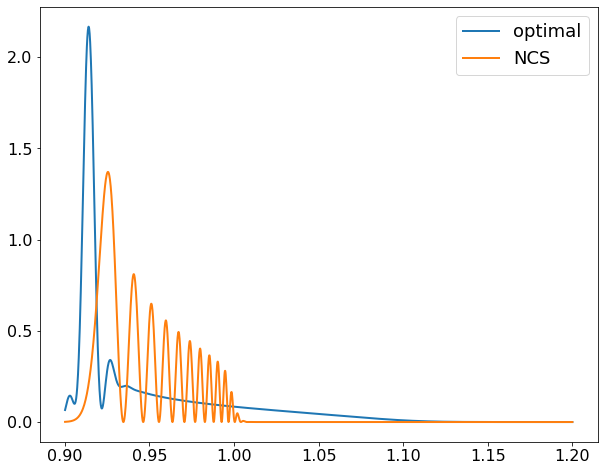

In [35]:
wb = [0.9, 1.2]
idx = (w > wb[0]) * (w < wb[1])
idx_NCS = (w_NCS > wb[0]) * (w_NCS < wb[1])

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(w[idx], N_ph[idx], label='optimal')
plt.plot(w_NCS[idx_NCS], N_ph_NCS[idx_NCS], label='NCS')
plt.legend(loc='best', fontsize=18)
# ax.set_xlim([.4,3.])
plt.show()

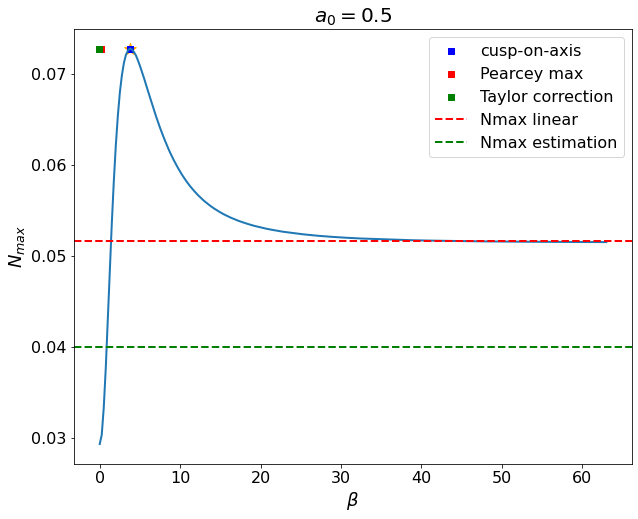

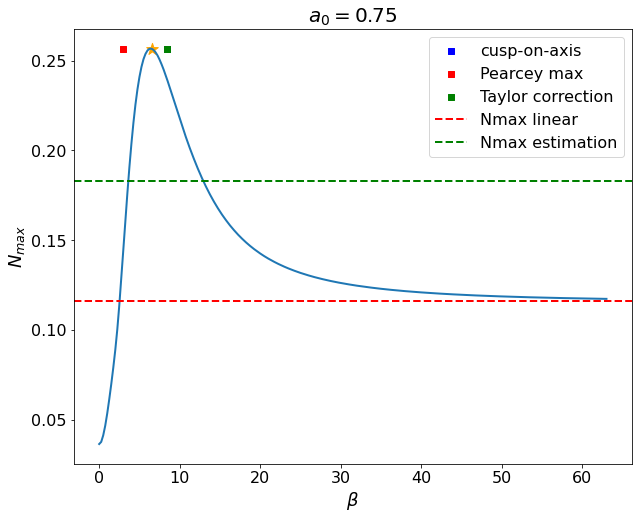

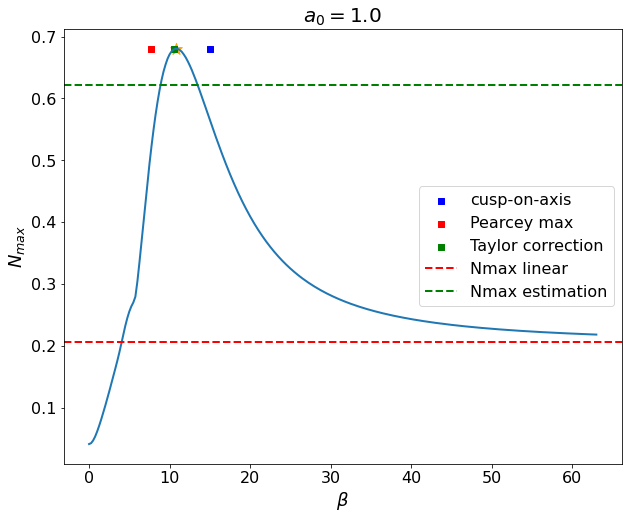

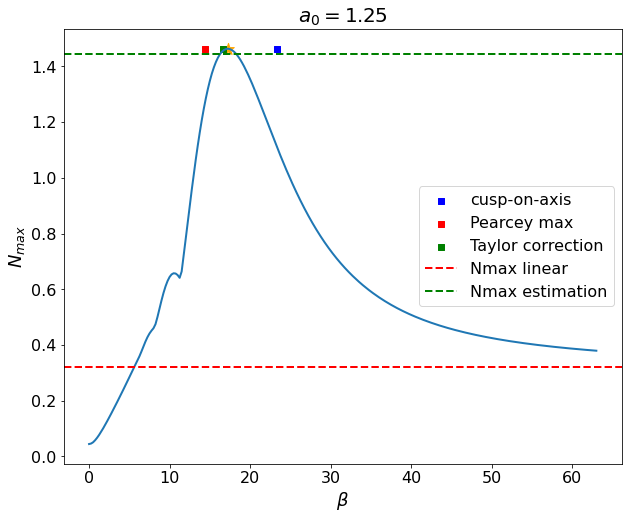

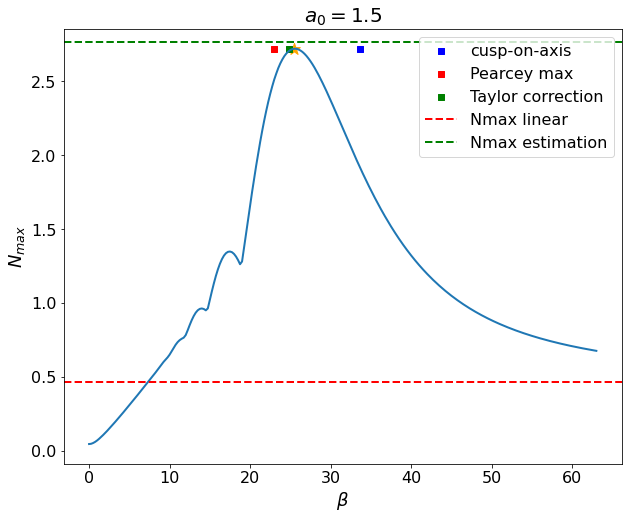

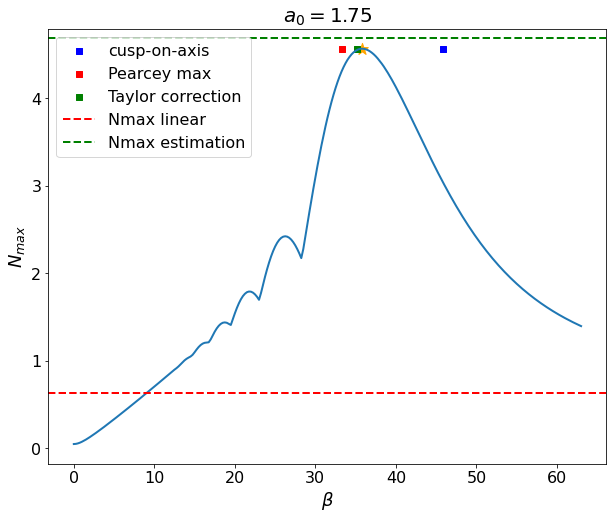

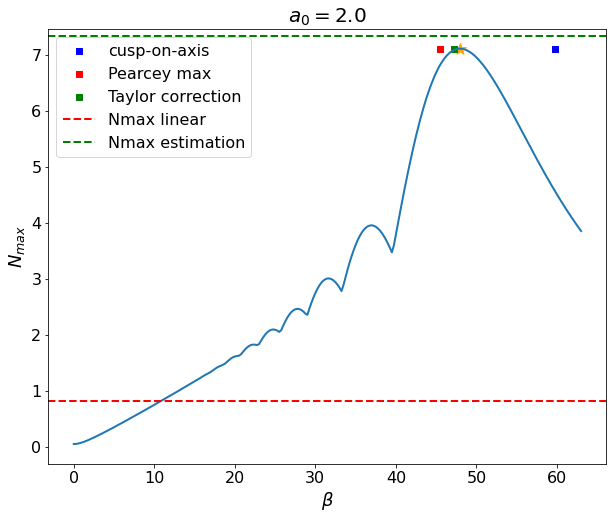

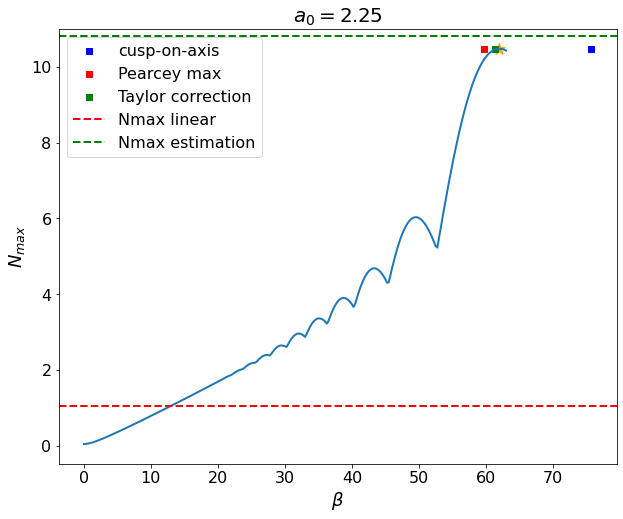

In [29]:
# Plot N_max(beta) + linear_reference + spectrum_estimate for a range of a0
n_a0 = a0_arr_tau_6.shape[0]
for idx in range(0, n_a0, 2):
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot(beta_arr_tau_6, N_max_beta_a0_tau_6[:,idx])
    y_pos = np.max(N_max_beta_a0_tau_6[:,idx])
    
    plt.scatter(beta_optimal_tau_6[idx], y_pos, color='orange', marker='*', s=150)
    plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', label='cusp-on-axis')
    plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', label='Pearcey max')
    plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', label='Taylor correction')
    
    ax.axhline(Nmax_linear[idx], linestyle='--', color='red', label='Nmax linear')
    ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', label='Nmax estimation')
    
    plt.xlabel('$\\beta$', fontsize=18)
    plt.ylabel('$N_{max}$', fontsize=18)
    plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

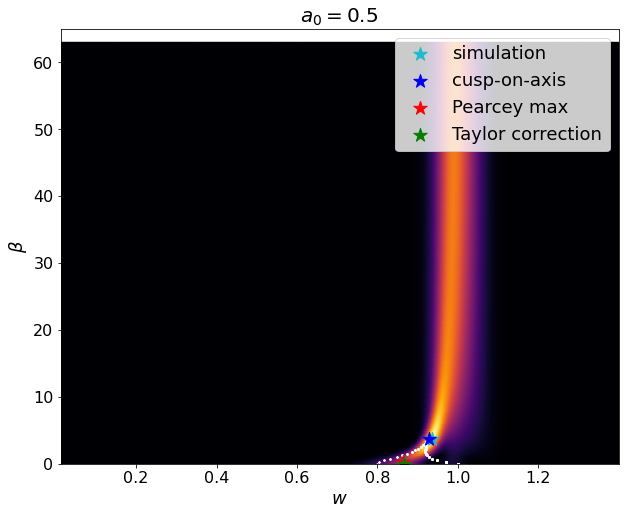

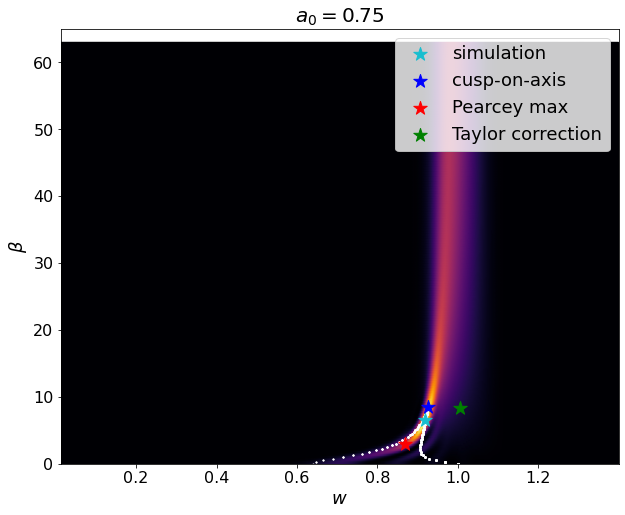

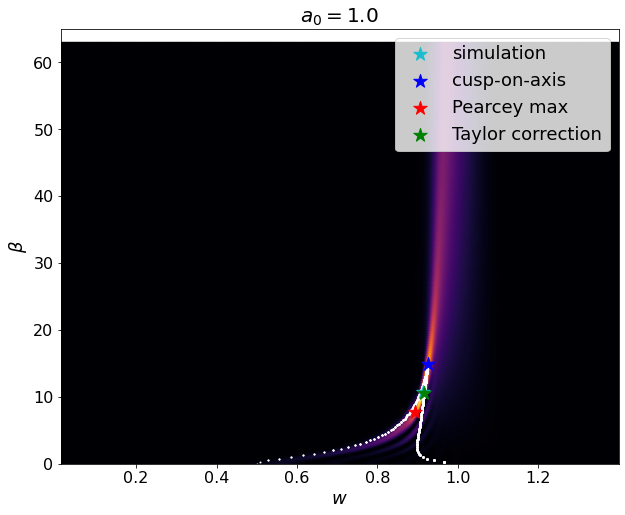

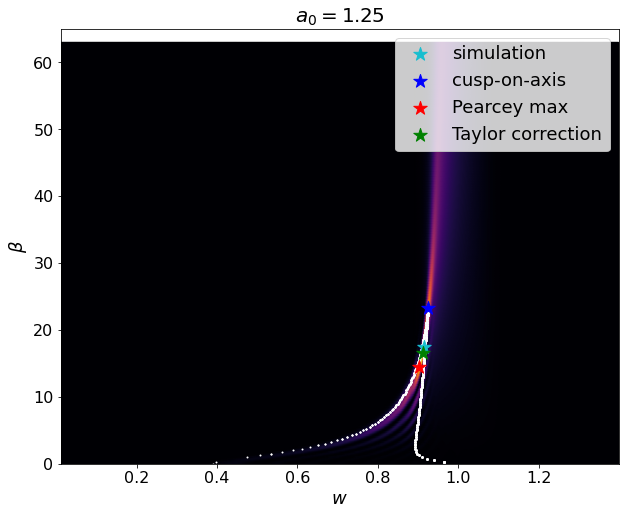

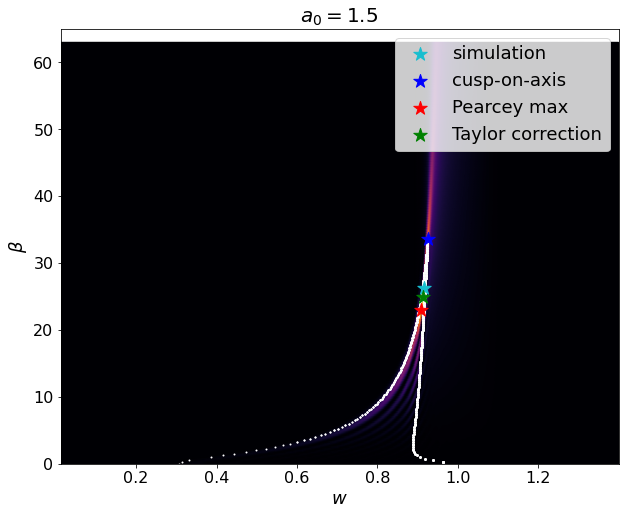

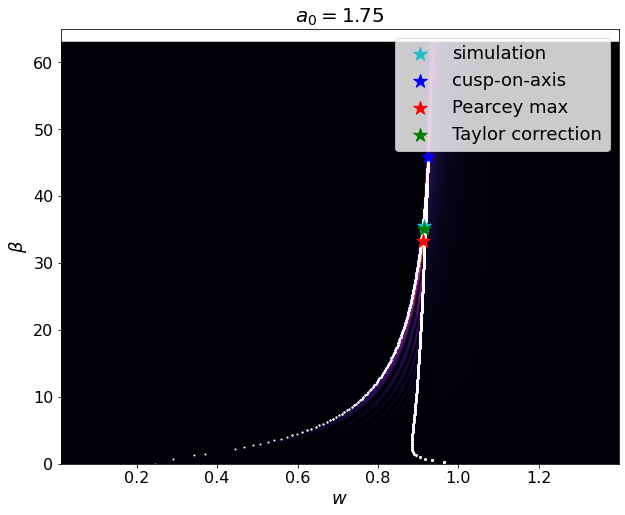

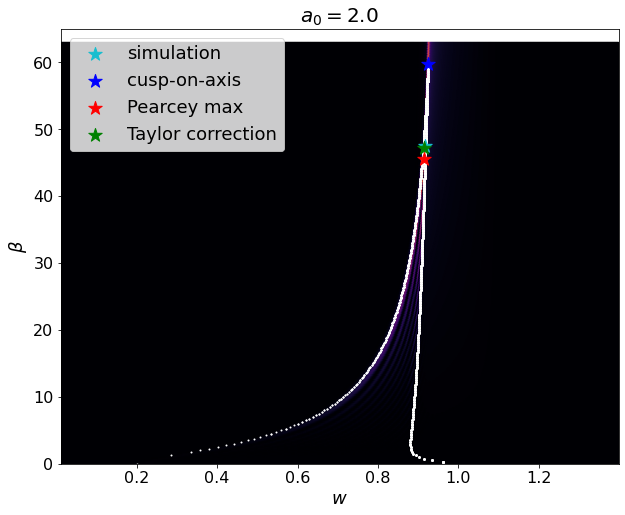

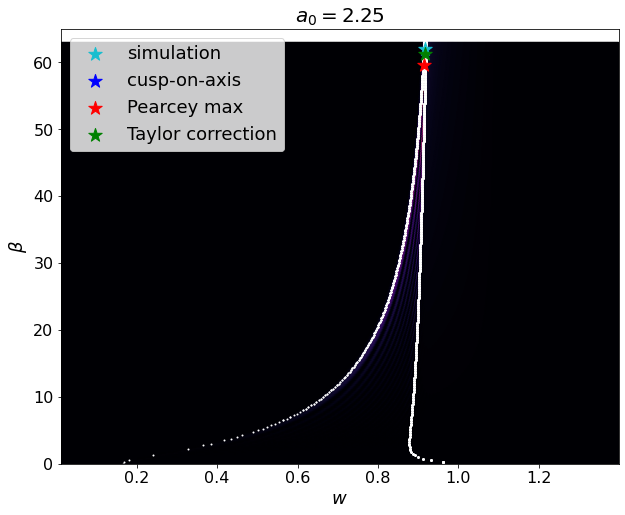

In [30]:
# For a range of a0 values plot folds+cusp plots in (beta, w)
tau = 6*np.pi

n_a0 = a0_arr_tau_6.shape[0]
for idx in range(0, n_a0, 2):
    idx_beta, idx_w = np.where(N_ph_a0_list_tau_6[idx] == N_ph_a0_list_tau_6[idx].max())
    beta_fold, w_fold = calculate_fold_w_beta(beta_arr_tau_6, a0_arr_tau_6[idx],
                                              tau, eps=2e-2)
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(w_a0_list_tau_6[idx], beta_arr_tau_6, N_ph_a0_list_tau_6[idx],
                   cmap='inferno', shading='gouraud')
    
    plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
    # for i,(phi, w) in enumerate(data):
    #     plt.plot(w, beta_arr[i]*np.ones_like(w), '.', color='white', markersize=2, zorder=1)
    plt.scatter(w_a0_list_tau_6[idx][idx_w[0]], beta_arr_tau_6[idx_beta[0]], color='tab:cyan', marker='*', s=200, zorder=2, label='simulation')
    plt.scatter(w_cusp[idx], beta_cusp[idx], color='blue', marker='*', s=200, zorder=2, label='cusp-on-axis')
    plt.scatter(w_Pe[idx], beta_Pe[idx], color='red', marker='*', s=200, zorder=2, label='Pearcey max')
    plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='green', marker='*', s=200, zorder=2, label='Taylor correction')

    ax.set_ylim([0.,65.])
    plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
    plt.xlabel('$w$', fontsize=18)
    plt.ylabel('$\\beta$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best', fontsize=18)
    plt.show()

## Optimal spectrum
For a given $(a_0, \tau)$ pair and optimal $\beta$ value plot the optimal on-axis spectrum.

In [104]:
tau = 2*np.pi
a0 = 1

idx_a0 = np.where(np.isclose(a0_arr_tau_6, a0))[0][0]
idx_beta = np.where(np.isclose(beta_arr_tau_6, beta_optimal_tau_6[idx_a0]))[0][0]
print(f'{idx_a0}, a0: {a0_arr_tau_6[idx_a0]}')
print(f'{idx_beta}, beta: {beta_arr_tau_6[idx_beta]}')
# idx_beta = 190

w_plot = w_a0_list_tau_6[idx_a0]
N_ph_plot = N_ph_a0_list_tau_6[idx_a0][idx_beta]

# w_linear = np.linspace(-0.8, 1.2, 1000)
N_ph_linear = w_plot / (137*4*np.pi) * a0**2*tau**2*np.exp(-tau**2*(w_plot-1)**2)

a0_ = a0 / (1 + beta_optimal_tau_6[idx_a0]**2)**0.25
tau_ = tau * np.sqrt(1 + beta_optimal_tau_6[idx_a0]**2)
print(a0_, tau_)

N_ph_linear_ = w_plot / (137*4*np.pi) * a0_**2*tau_**2*np.exp(-tau_**2*(w_plot-1)**2)

4, a0: 1.0
43, beta: 10.75
0.3043408762054447 67.83585373538033


In [105]:
u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
mode = 'gauss_spectral'   # Temporal envelope
idx_a0 = np.where(np.isclose(a0_arr_tau_6, a0))[0][0]
beta = beta_optimal_tau_6[idx_a0]  # Chirp parameter
polarization = 'circular'

a0_ = a0 / (1 + beta_optimal_tau_6[idx_a0]**2)**0.25
tau_ = tau * np.sqrt(1 + beta_optimal_tau_6[idx_a0]**2)
beta_ = 0

eta_b = 4.4*tau_*np.sqrt(1+beta_**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau_, a0_, beta_)
u_NCS, r_NCS = traj.calc_u_x(A, eta)

# Calculate spectrum
spec_NCS = Spectrum(eta, u_NCS, r_NCS)

I_NCS, w_NCS = spec_NCS.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0.01,2.], n_padded=16)
N_ph_NCS = I_NCS / w_NCS / 137

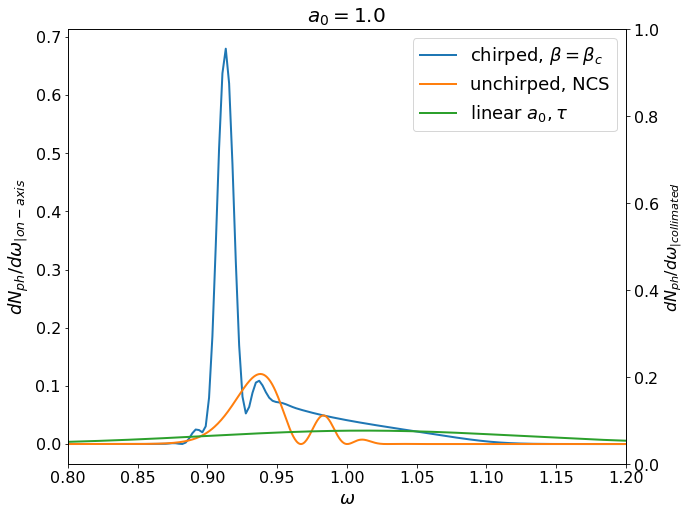

In [106]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(w_plot, N_ph_plot, label='chirped, $\\beta=\\beta_c$')
plt.plot(w_NCS, N_ph_NCS, label='unchirped, NCS')
plt.plot(w_plot, N_ph_linear, label='linear $a_0, \\tau$')
# plt.plot(w_NCS_0, N_ph_NCS_0, label='unchirped, NCS_0')
# plt.plot(w_plot, N_ph_linear_, color='red', label='linear $a_{eff}, \\tau_{eff}$')

# ax.axvline(1/(1+a0_**2), linestyle='--', color='black')
ax.set_xlim([0.8,1.2])
plt.xlabel('$\omega$', fontsize=18)
plt.ylabel('$dN_{ph}/d\omega_{|on-axis}$', fontsize=18)
plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx_a0]), fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=18)

ax2 = ax.twinx()
# ax2.plot(w_L_interpolated, N_ph_w_L_collimated, '--', color='green')
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax2.set_ylabel('$dN_{ph}/d\omega_{|collimated}$')

plt.show()

In [108]:
# calculate bandwidth for uncollimated spectra on inset plot
w_average = np.sum(w_plot * N_ph_plot) / np.sum(N_ph_plot)
w_sq = np.sqrt(np.sum((w_plot - w_average)**2 * N_ph_plot) / np.sum(N_ph_plot))
bw = w_sq / w_average
print(f"Average w for optimal chirp: {w_average}")
print(f"rms for optimal chirp: {w_sq}")
print(f"bw for optimal chirp: {bw}")
print()

w_average = np.sum(w_plot * N_ph_linear) / np.sum(N_ph_linear)
w_sq = np.sqrt(np.sum((w_plot - w_average)**2 * N_ph_linear) / np.sum(N_ph_linear))
bw = w_sq / w_average
print(f"Average w for linear case: {w_average}")
print(f"rms for linear case: {w_sq}")
print(f"bw for linear case: {bw}")
print()

w_average = np.sum(w_NCS * N_ph_NCS) / np.sum(N_ph_NCS)
w_sq = np.sqrt(np.sum((w_NCS - w_average)**2 * N_ph_NCS) / np.sum(N_ph_NCS))
bw = w_sq / w_average
print(f"Average w for NCS case: {w_average}")
print(f"rms for NCS case: {w_sq}")
print(f"bw for NCS case: {bw}")
print()

Average w for optimal chirp: 0.9415544727655335
rms for optimal chirp: 0.04529897598265493
bw for optimal chirp: 0.04811083935441652

Average w for linear case: 1.0125557718442868
rms for linear case: 0.11163445117931341
bw for linear case: 0.11025017513453157

Average w for NCS case: 0.9400633062549324
rms for NCS case: 0.02552515991803674
bw for NCS case: 0.027152596796618994



In [46]:
folder = 'data/simulation/optimal_spectra/tau_6'

In [ ]:
np.save(folder + '/w.npy', w_plot)

In [70]:
np.save(folder + '/w.npy', w_plot)
np.save(folder + '/w_L.npy', w_L_interpolated)
np.save(folder + '/N_ph.npy', N_ph_plot)
np.save(folder + '/N_ph_linear.npy', N_ph_linear)
np.save(folder + '/N_ph_w_L_collimated.npy', N_ph_w_L_collimated_1)

In [27]:
np.save(folder + '/N_ph_w_L_collimated_upd.npy', N_ph_w_L_collimated_1)

In [36]:
np.save(folder + '/N_ph_w_L_collimated_NCS.npy', N_ph_w_L_collimated_1_NCS)

In [26]:
np.save(folder + '/w_NCS.npy', w_NCS)
np.save(folder + '/N_ph_NCS.npy', N_ph_NCS)

### Angular distribution
For specified parameters calculate 2d distribution and integrate over some collimation angle

In [31]:
u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
tau = 6 * np.pi    # Pulse duration
a0 = 2             # Pulse amplitude
mode = 'gauss_spectral'   # Temporal envelope
idx_a0 = np.where(np.isclose(a0_arr_tau_6, a0))[0][0]
beta = beta_optimal_tau_6[idx_a0]  # Chirp parameter
polarization = 'circular'

# Define laser phase grid and calculate vector potential
eta_b = 4.4*tau*np.sqrt(1+beta**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau, a0, beta)
u, r = traj.calc_u_x(A, eta)

# Calculate spectrum
spec = Spectrum(eta, u, r)

theta = np.pi
phi = 0
I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,2.])

a0_ = a0 / (1 + beta_optimal_tau_6[idx_a0]**2)**0.25
tau_ = tau * np.sqrt(1 + beta_optimal_tau_6[idx_a0]**2)
beta_ = 0

eta_b = 4.4*tau_*np.sqrt(1+beta_**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau_, a0_, beta_)
u_NCS, r_NCS = traj.calc_u_x(A, eta)

# Calculate spectrum
spec_NCS = Spectrum(eta, u_NCS, r_NCS)

I_NCS, w_NCS = spec_NCS.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,4.])
N_ph_NCS = I_NCS / w_NCS / 137

a0_ = a0 / (1 + beta_optimal_tau_6[idx_a0]**2)**0.25
tau_ = tau * np.sqrt(1 + beta_optimal_tau_6[idx_a0]**2)
beta_ = 0

eta_b = 4.4*tau_*np.sqrt(1+beta_**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau_, a0_, beta_)
u_NCS, r_NCS = traj.calc_u_x(A, eta)

# Calculate spectrum
spec_NCS = Spectrum(eta, u_NCS, r_NCS)

I_NCS_0, w_NCS_0 = spec_NCS.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,2.])
N_ph_NCS_0 = I_NCS_0 / w_NCS_0 / 137

In [18]:
theta_start, theta_end = np.pi/2, np.pi
n_theta = 200
theta_arr = np.linspace(theta_start, theta_end, n_theta)

I_theta_w_fixed, theta_fixed, w_fixed = spec.calc_spectrum_I_theta_w(theta_arr, interpolate_w=False,
                                                                     fixed_length=True, w_bound=[0.02,12.])

In [19]:
gamma = 500
w0, w1 = [0., 16.]
idx = (w_fixed[-1] > w0) & (w_fixed[-1] < w1)
I_L, theta_L, w_L = Spectrum.Lorentz_transform_I_theta_w(I_theta_w_fixed[:,idx], theta_fixed[:,idx],
                                                         w_fixed[:,idx], gamma=gamma)

In [20]:
idx = gamma*(np.pi - theta_L[:,0]) < 0.1
print(np.sum(idx))

26


In [21]:
N_ph_L = I_L / w_L / 137

<ipython-input-22-84259f068625>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(w_L/(2*gamma), gamma*(np.pi-theta_L), N_ph_L, cmap='inferno')


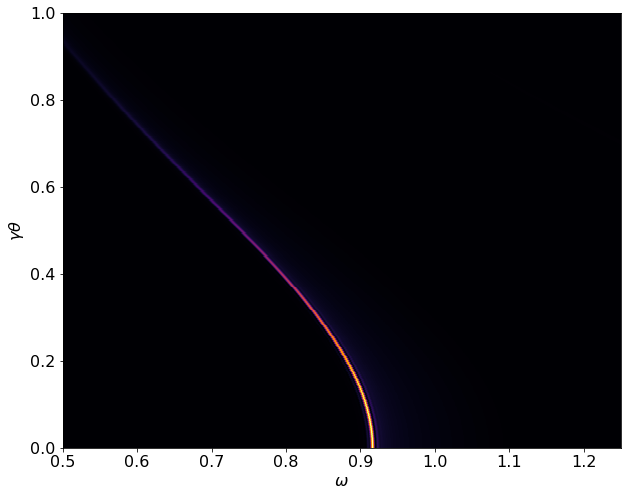

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(w_L/(2*gamma), gamma*(np.pi-theta_L), N_ph_L, cmap='inferno')
ax.set_xlim([0.5,1.25])
ax.set_ylim([0.,1.])
plt.xlabel('$\omega$')
plt.ylabel('$\gamma \\theta$')
plt.show()

In [23]:
w_bound = [0.02, 1.2]
N_ph_L_interpolated, w_L_interpolated = Spectrum.interpolate_I_theta_w(N_ph_L, w_L/(2*gamma),
                                                                       w_bound=w_bound)
theta_L_interpolated = theta_L[:,0]

# Collimate over theta_col angle and calculate the number of photons
theta_col = 0.1/gamma
N_ph_w_L_collimated_1 = Spectrum.collimate_I_theta_w(N_ph_L_interpolated, theta_L_interpolated,
                                                   w_L_interpolated, theta_col=theta_col)
N_ph_w_L_collimated_1 *= 2 * np.pi

theta_col = 0.2/gamma
N_ph_w_L_collimated_2 = Spectrum.collimate_I_theta_w(N_ph_L_interpolated, theta_L_interpolated,
                                                   w_L_interpolated, theta_col=theta_col)
N_ph_w_L_collimated_2 *= 2 * np.pi

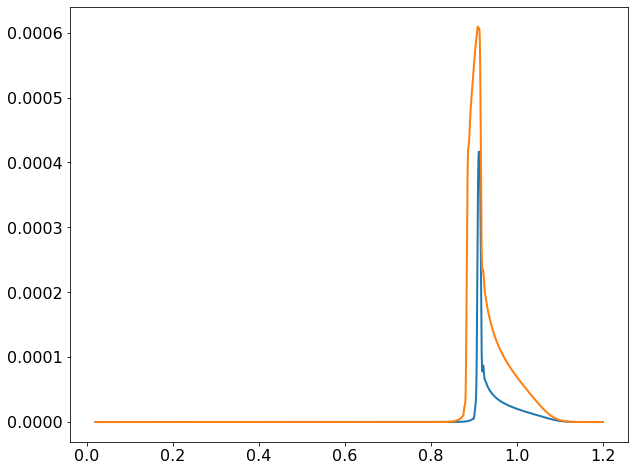

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(w_L_interpolated, N_ph_w_L_collimated_1)
plt.plot(w_L_interpolated, N_ph_w_L_collimated_2)
plt.show()

In [28]:
theta_start, theta_end = np.pi/2, np.pi
n_theta = 200
theta_arr = np.linspace(theta_start, theta_end, n_theta)

I_theta_w_fixed_NCS, theta_fixed_NCS, w_fixed_NCS = spec_NCS.calc_spectrum_I_theta_w(theta_arr, interpolate_w=False,
                                                                     fixed_length=True, w_bound=[0.02,12.])

In [29]:
gamma = 500
w0, w1 = [0., 16.]
idx = (w_fixed_NCS[-1] > w0) & (w_fixed_NCS[-1] < w1)
I_L_NCS, theta_L_NCS, w_L_NCS = Spectrum.Lorentz_transform_I_theta_w(I_theta_w_fixed_NCS[:,idx],
                                                                     theta_fixed_NCS[:,idx],
                                                                     w_fixed_NCS[:,idx], gamma=gamma)

In [30]:
idx = gamma*(np.pi - theta_L_NCS[:,0]) < 0.1
print(np.sum(idx))
N_ph_L_NCS = I_L_NCS / w_L_NCS / 137

26


<ipython-input-31-2cf07cd9ad52>:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(w_L_NCS/(2*gamma), gamma*(np.pi-theta_L_NCS), N_ph_L_NCS, cmap='inferno')


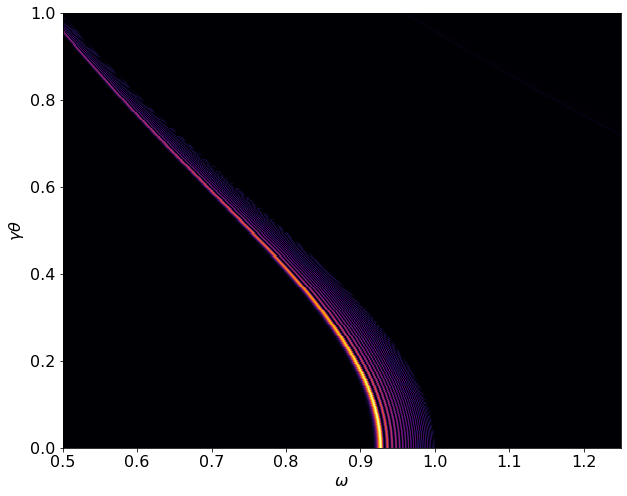

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(w_L_NCS/(2*gamma), gamma*(np.pi-theta_L_NCS), N_ph_L_NCS, cmap='inferno')
ax.set_xlim([0.5,1.25])
ax.set_ylim([0.,1.])
plt.xlabel('$\omega$')
plt.ylabel('$\gamma \\theta$')
plt.show()

In [32]:
w_bound = [0.02, 1.2]
N_ph_L_interpolated_NCS, w_L_interpolated_NCS = Spectrum.interpolate_I_theta_w(N_ph_L_NCS,
                                                                               w_L_NCS/(2*gamma),
                                                                               w_bound=w_bound)
theta_L_interpolated_NCS = theta_L_NCS[:,0]

# Collimate over theta_col angle and calculate the number of photons
theta_col = 0.1/gamma
N_ph_w_L_collimated_1_NCS = Spectrum.collimate_I_theta_w(N_ph_L_interpolated_NCS,
                                                         theta_L_interpolated_NCS,
                                                         w_L_interpolated_NCS, theta_col=theta_col)
N_ph_w_L_collimated_1_NCS *= 2 * np.pi

theta_col = 0.2/gamma
N_ph_w_L_collimated_2_NCS = Spectrum.collimate_I_theta_w(N_ph_L_interpolated_NCS,
                                                         theta_L_interpolated_NCS,
                                                         w_L_interpolated_NCS, theta_col=theta_col)
N_ph_w_L_collimated_2_NCS *= 2 * np.pi

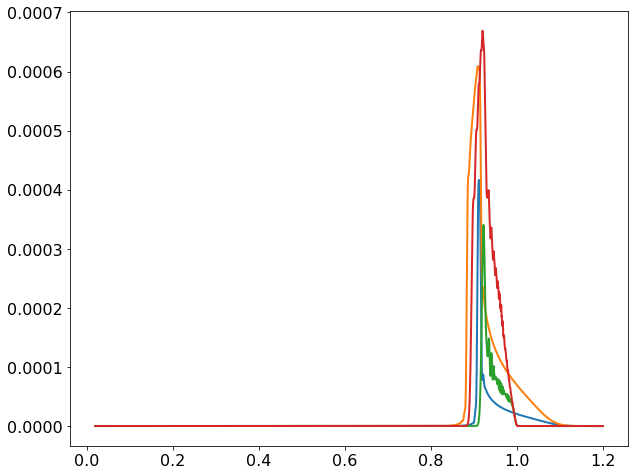

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(w_L_interpolated, N_ph_w_L_collimated_1)
plt.plot(w_L_interpolated, N_ph_w_L_collimated_2)
plt.plot(w_L_interpolated_NCS, N_ph_w_L_collimated_1_NCS)
plt.plot(w_L_interpolated_NCS, N_ph_w_L_collimated_2_NCS)
plt.show()

### Collimate NCS spectra

### Calculate NCS peak for $a_{0,eff}(\beta = \beta_*), \tau_{eff}(\beta = \beta_*)$

In [7]:
# Calculate NCS for (a0_eff, tau_eff, beta=0) for a range of a0 to put on Figure 3.
tau = 6*np.pi
polarization = 'linear'
N_ph_NCS_arr, w_NCS_arr, N_ph_NCS_max = [], [], []

for idx,a0 in enumerate(a0_arr_tau_6):
    beta_opt = beta_optimal_tau_6[idx]
    a0_eff = a0 / (1 + beta_opt**2)**0.25
    tau_eff = tau * np.sqrt(1 + beta_opt**2)
    
    eta_b = 4.4*tau_eff
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau_eff, a0_eff, beta=0, polarization=polarization)
    u, r = traj.calc_u_x(A, eta)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    I_NCS_, w_NCS_ = spec.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,2.])
    idx = w_NCS_ > 0
    N_ph_NCS_ = I_NCS_[idx] / w_NCS_[idx] / 137
    w_NCS_arr.append(w_NCS_)
    N_ph_NCS_arr.append(N_ph_NCS_)
    N_ph_NCS_max.append(N_ph_NCS_.max())

In [29]:
folder = 'data/simulation/linear/tau_6'
np.save(folder + '/Nmax_NCS.npy', np.array(N_ph_NCS_max))

In [45]:
# Calculate NCS for (a0_eff, tau_eff, beta=0) for a range of a0 to put on Figure 3.
tau = 4*np.pi
polarization = 'linear'
N_ph_NCS_arr, w_NCS_arr, N_ph_NCS_max = [], [], []

for idx,a0 in enumerate(a0_arr_tau_4):
    beta_opt = beta_optimal_tau_4[idx]
    a0_eff = a0 / (1 + beta_opt**2)**0.25
    tau_eff = tau * np.sqrt(1 + beta_opt**2)
    
    eta_b = 4.4*tau_eff
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau_eff, a0_eff, beta=0, polarization=polarization)
    u, r = traj.calc_u_x(A, eta)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    I_NCS_, w_NCS_ = spec.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,2.])
    idx = w_NCS_ > 0
    N_ph_NCS_ = I_NCS_[idx] / w_NCS_[idx] / 137
    w_NCS_arr.append(w_NCS_)
    N_ph_NCS_arr.append(N_ph_NCS_)
    N_ph_NCS_max.append(N_ph_NCS_.max())

In [31]:
folder = 'data/simulation/linear/tau_4'
np.save(folder + '/Nmax_NCS.npy', np.array(N_ph_NCS_max))

In [32]:
# Calculate NCS for (a0_eff, tau_eff, beta=0) for a range of a0 to put on Figure 3.
tau = 2*np.pi
polarization = 'linear'
N_ph_NCS_arr, w_NCS_arr, N_ph_NCS_max = [], [], []

for idx,a0 in enumerate(a0_arr_tau_2):
    beta_opt = beta_optimal_tau_2[idx]
    a0_eff = a0 / (1 + beta_opt**2)**0.25
    tau_eff = tau * np.sqrt(1 + beta_opt**2)
    
    eta_b = 4.4*tau_eff
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau_eff, a0_eff, beta=0, polarization=polarization)
    u, r = traj.calc_u_x(A, eta)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    I_NCS_, w_NCS_ = spec.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,2.])
    idx = w_NCS_ > 0
    N_ph_NCS_ = I_NCS_[idx] / w_NCS_[idx] / 137
    w_NCS_arr.append(w_NCS_)
    N_ph_NCS_arr.append(N_ph_NCS_)
    N_ph_NCS_max.append(N_ph_NCS_.max())

In [33]:
folder = 'data/simulation/linear/tau_2'
np.save(folder + '/Nmax_NCS.npy', np.array(N_ph_NCS_max))

### Calculate NCS spectra for $a_{0,eff}(\beta=0), \tau_{eff}(\beta=0)$

In [26]:
# Calculate NCS for (a0_eff, tau_eff, beta=0) for a range of a0 to put on Figure 3.
tau = 6*np.pi
N_ph_NCS_0_arr, w_NCS_0_arr, N_ph_NCS_0_max = [], [], []
theta, phi = np.pi, 0

for idx,a0 in enumerate(a0_arr_tau_6):
    beta_opt = beta_optimal_tau_6[idx]
    a0_eff = a0 #/ (1 + beta_opt**2)**0.25
    tau_eff = tau #* np.sqrt(1 + beta_opt**2)
    
    eta_b = 4.4*tau_eff
    eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
    A = calc_A(eta, mode, tau_eff, a0_eff, beta=0)
    u, r = traj.calc_u_x(A, eta)

    # Calculate spectrum
    spec = Spectrum(eta, u, r)

    I_NCS_, w_NCS_ = spec.calc_spectrum_I_w(theta=theta, phi=phi, wb=[0,4.])
    idx = w_NCS_ > 0
    N_ph_NCS_ = I_NCS_[idx] / w_NCS_[idx] / 137
    w_NCS_0_arr.append(w_NCS_)
    N_ph_NCS_0_arr.append(N_ph_NCS_)
    N_ph_NCS_0_max.append(N_ph_NCS_.max())

In [20]:
folder = 'data/simulation/tau_6'
np.save(folder + '/Nmax_NCS_0.npy', np.array(N_ph_NCS_0_max))

In [27]:
print(N_ph_NCS_0_max)

[0.02930761902998665, 0.03323796848545686, 0.03649344430688704, 0.03909910474046487, 0.0413294275228607, 0.04310311350536651, 0.044425153093935105, 0.04571960992780414, 0.04671026370413209, 0.04742772468435131, 0.048113227313155905, 0.04868092051170986, 0.04915957481203809, 0.04970754261136265, 0.049921573721735085]
